# Synthetic dataset

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
from skmultiflow.data import DataStream

## Preprocessing

In [24]:
data = pd.read_csv("Data//dataset.csv")
data.head()

,TIMESTAMP #,PEOPLE DOING BBQ#,TEMPERATURE#,PEOPLE LEAVING CITY#
0,0,0,22.628528,18916
1,1,46132,28.763520,37587
2,2,57374,33.753462,55974
3,3,33698,35.240134,74725
4,4,17216,34.670493,93760


In [25]:
data.columns = ["Timestamp","People making BBQ","Temperature","People leaving city"]
data.head()

,Timestamp,People making BBQ,Temperature,People leaving city
0,0,0,22.628528,18916
1,1,46132,28.763520,37587
2,2,57374,33.753462,55974
3,3,33698,35.240134,74725
4,4,17216,34.670493,93760


In [26]:
num_cols = len(data.columns)
num_rows = data.shape[0]
print (data.dtypes)

Timestamp                int64
People making BBQ        int64
Temperature            float64
People leaving city      int64
dtype: object


In [27]:
data.describe(include='all')

,Timestamp,People making BBQ,Temperature,People leaving city
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,9999.500000,25815.235550,22.814492,49937.388600
std,5773.647028,22782.065623,9.063064,29913.690857
min,0.000000,0.000000,10.091141,0.000000
25%,4999.750000,7004.500000,14.266179,23514.750000
50%,9999.500000,18165.000000,22.806352,49736.000000
75%,14999.250000,40367.250000,31.573837,76232.500000
max,19999.000000,94626.000000,36.153731,100000.000000


In [28]:
# Create column of Date 
date = []
from datetime import datetime
for i in range(0, num_rows):
    timestamp = data['Timestamp'][i]
    date.append(datetime.fromtimestamp(timestamp))
data.insert(0, "Date", date)
num_cols = len(data.columns)
data.head()

,Date,Timestamp,People making BBQ,Temperature,People leaving city
0,1970-01-01 01:00:00,0,0,22.628528,18916
1,1970-01-01 01:00:01,1,46132,28.763520,37587
2,1970-01-01 01:00:02,2,57374,33.753462,55974
3,1970-01-01 01:00:03,3,33698,35.240134,74725
4,1970-01-01 01:00:04,4,17216,34.670493,93760


In [29]:
data.tail()

,Date,Timestamp,People making BBQ,Temperature,People leaving city
19995,1970-01-01 06:33:15,19995,22009,28.776561,80114
19996,1970-01-01 06:33:16,19996,18297,33.561052,99437
19997,1970-01-01 06:33:17,19997,437,35.266567,50571
19998,1970-01-01 06:33:18,19998,33597,34.192807,2628
19999,1970-01-01 06:33:19,19999,72056,31.746447,21424


In [30]:
data = data[["Timestamp","People making BBQ","Temperature","People leaving city"]]
num_cols = len(data.columns)
data.head()

,Timestamp,People making BBQ,Temperature,People leaving city
0,0,0,22.628528,18916
1,1,46132,28.763520,37587
2,2,57374,33.753462,55974
3,3,33698,35.240134,74725
4,4,17216,34.670493,93760


In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<IPython.core.display.Javascript object>


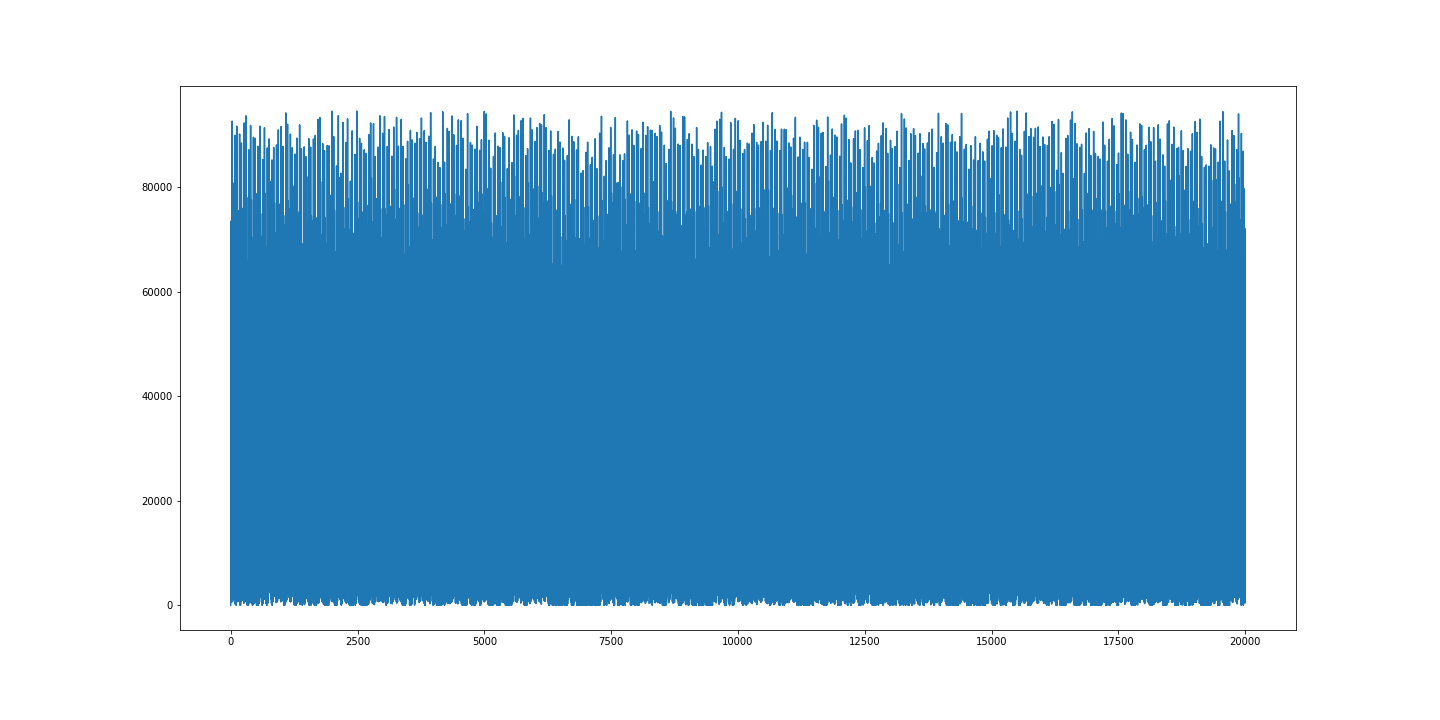

C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\agustic\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [12]:
plt.figure(figsize=(20,10))
plt.plot(data['Timestamp'], data['People making BBQ'])
plt.show()

In [13]:
data[:100]

,Timestamp,People making BBQ,Temperature,People leaving city
0,0,0,22.628528,18916
1,1,46132,28.763520,37587
2,2,57374,33.753462,55974
3,3,33698,35.240134,74725
4,4,17216,34.670493,93760
...,...,...,...,...
95,95,12970,34.775414,99816
96,96,130,31.286785,50731
97,97,45133,26.163397,2561
98,98,74110,19.688094,22292


In [14]:
def take_values_time_intervals(minutes):
    # Create a subset taking a value of the dataset each "minutes"
    list_values = []

    difference_between_times = 0

    for i in range(0,num_rows):
        if i != num_rows-1:
            if(i==0):
                list_values.append(data.iloc[i,:])
            elif(minutes<=difference_between_times):
                list_values.append(data.iloc[i,:])
                difference_between_times = 0
            difference_between_times += (data.iloc[:,0][i+1] - data.iloc[:,0][i]).total_seconds() / 60
            
    return pd.DataFrame(list_values)

In [15]:
# Create a subset for every value of the time_intervals
time_intervals = [5,10,15,30,60,1440]
for i in time_intervals:
    name_variable = "subset_" + str(i)
    locals()[name_variable]= take_values_time_intervals(i)

AttributeError: 'numpy.int64' object has no attribute 'total_seconds'

## Implementation of the algorithms

### HoeffdingTreeRegressor

In [36]:
def hoeffdingTreeRegressor(data):
    from skmultiflow.trees import HoeffdingTreeRegressor
    import numpy as np
    from skmultiflow.data import DataStream
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    comparison = data[["People making BBQ"]].copy()

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")
    ht_reg = HoeffdingTreeRegressor()

    n_samples = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = ht_reg.predict(X)[0]
        ht_reg.partial_fit(X, y)
        n_samples += 1

    comparison.insert(1, "People making BBQ predicted", y_pred)
    print('Hoeffding Tree regressor')
    print('{} samples analyzed.'.format(n_samples))
    print('Mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

    pd.set_option('display.max_rows', None)
    print(comparison)


In [54]:
def hoeffdingTreeRegressor_try(data):
    from skmultiflow.trees import HoeffdingTreeRegressor
    import numpy as np
    from skmultiflow.data import DataStream
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    comparison = data[["People making BBQ"]].copy()

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")
    ht_reg = HoeffdingTreeRegressor()

    n_samples = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = ht_reg.predict(X)[0]
        print(X)
        ht_reg.partial_fit(X, y)
        n_samples += 1

    comparison.insert(1, "People making BBQ predicted", y_pred)
    print('Hoeffding Tree regressor')
    print('{} samples analyzed.'.format(n_samples))
    print('Mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

    pd.set_option('display.max_rows', None)
    print(comparison)


In [55]:
hoeffdingTreeRegressor_try(data)

[[   22.62852759 18916.             0.        ]]
[[2.87635204e+01 3.75870000e+04 4.61320000e+04]]
[[3.37534616e+01 5.59740000e+04 5.73740000e+04]]
[[3.52401342e+01 7.47250000e+04 3.36980000e+04]]
[[3.46704931e+01 9.37600000e+04 1.72160000e+04]]
[[3.08525262e+01 4.73910000e+04 4.44800000e+03]]
[[2.59077402e+01 1.31000000e+03 4.96610000e+04]]
[[1.97237827e+01 2.04870000e+04 7.36020000e+04]]
[[1.43856342e+01 3.97190000e+04 3.43690000e+04]]
[[1.08393454e+01 5.81730000e+04 1.38610000e+04]]
[[1.00938682e+01 7.75610000e+04 5.46000000e+03]]
[[1.22718211e+01 9.63390000e+04 2.54000000e+03]]
[[1.68265052e+01 5.03960000e+04 6.12000000e+02]]
[[   23.01010016  2333.         15604.        ]]
[[2.86065197e+01 2.17980000e+04 5.74560000e+04]]
[[3.33162762e+01 4.01160000e+04 7.11050000e+04]]
[[3.58116285e+01 5.94440000e+04 4.73760000e+04]]
[[3.51850854e+01 7.77970000e+04 2.63640000e+04]]
[[3.10466434e+01 9.75160000e+04 1.51910000e+04]]
[[2.56826157e+01 4.99700000e+04 2.31300000e+03]]
[[1.95775697e+01 3.1

[[2.27428211e+01 4.91470000e+04 9.92000000e+02]]
[[2.87549871e+01 3.64200000e+03 2.92250000e+04]]
[[3.39029509e+01 2.33770000e+04 8.85260000e+04]]
[[3.60851569e+01 4.16490000e+04 5.79820000e+04]]
[[3.47871307e+01 6.01100000e+04 3.70800000e+04]]
[[3.08559866e+01 7.90220000e+04 2.81750000e+04]]
[[2.55124251e+01 9.87130000e+04 1.97970000e+04]]
[[1.99741936e+01 4.98880000e+04 9.30000000e+02]]
[[1.42326034e+01 2.41700000e+03 2.22140000e+04]]
[[1.0815479e+01 2.1291000e+04 2.1963000e+04]]
[[1.00937223e+01 4.06610000e+04 1.02290000e+04]]
[[1.22932526e+01 6.03970000e+04 6.71700000e+03]]
[[1.70073914e+01 7.85600000e+04 6.64900000e+03]]
[[2.30756669e+01 9.81910000e+04 6.89000000e+03]]
[[2.92224082e+01 5.19440000e+04 1.07000000e+03]]
[[3.30727605e+01 5.65600000e+03 4.55970000e+04]]
[[3.61537315e+01 2.43100000e+04 7.60070000e+04]]
[[3.4477593e+01 4.2536000e+04 4.7823000e+04]]
[[3.1706293e+01 6.1383000e+04 4.1590000e+04]]
[[2.55120001e+01 7.94430000e+04 3.43490000e+04]]
[[1.95328469e+01 9.77660000e+

[[3.51803723e+01 4.74900000e+03 3.76640000e+04]]
[[3.53143065e+01 2.38140000e+04 6.51950000e+04]]
[[3.08248722e+01 4.29500000e+04 5.15840000e+04]]
[[2.59868404e+01 6.14880000e+04 5.39550000e+04]]
[[1.99149367e+01 8.04050000e+04 2.88970000e+04]]
[[1.44172058e+01 9.94390000e+04 8.63400000e+03]]
[[1.08127948e+01 5.32190000e+04 1.29000000e+02]]
[[  10.0917472 4325.        6077.       ]]
[[1.23121151e+01 2.29810000e+04 1.08260000e+04]]
[[1.70098831e+01 4.19510000e+04 1.29720000e+04]]
[[2.28432831e+01 6.14850000e+04 1.86610000e+04]]
[[2.83615818e+01 7.96000000e+04 2.23300000e+04]]
[[3.3111555e+01 9.9176000e+04 1.8232000e+04]]
[[3.50472534e+01 5.30530000e+04 6.61000000e+02]]
[[   34.50355602  7972.         32478.        ]]
[[3.15251322e+01 2.61530000e+04 6.64710000e+04]]
[[2.54960006e+01 4.44450000e+04 6.65290000e+04]]
[[1.98610189e+01 6.27210000e+04 4.01250000e+04]]
[[1.42950661e+01 8.10640000e+04 1.63380000e+04]]
[[1.08144036e+01 9.99720000e+04 4.29900000e+03]]
[[1.00945325e+01 5.15410000e+

[[2.55542248e+01 6.16870000e+04 5.31240000e+04]]
[[1.97568455e+01 7.99400000e+04 2.77980000e+04]]
[[1.42228185e+01 9.86880000e+04 8.70000000e+03]]
[[1.08449674e+01 5.19080000e+04 2.94000000e+02]]
[[  10.09276602 5929.         6284.        ]]
[[1.23057625e+01 2.39650000e+04 1.06470000e+04]]
[[1.6701594e+01 4.2095000e+04 1.2793000e+04]]
[[2.25940157e+01 6.12320000e+04 1.79460000e+04]]
[[2.85002633e+01 8.03730000e+04 2.19890000e+04]]
[[3.30677631e+01 9.86590000e+04 1.77130000e+04]]
[[3.54113014e+01 5.28620000e+04 1.08000000e+03]]
[[   34.37702348  6013.         31666.        ]]
[[3.14690471e+01 2.51160000e+04 6.85620000e+04]]
[[2.58588772e+01 4.37010000e+04 6.77290000e+04]]
[[1.96836004e+01 6.24780000e+04 4.18290000e+04]]
[[1.42836137e+01 8.10640000e+04 1.61520000e+04]]
[[1.08179203e+01 1.00000000e+05 4.29200000e+03]]
[[1.00944378e+01 5.36460000e+04 0.00000000e+00]]
[[  12.30476953 4907.         5248.        ]]
[[1.68557602e+01 2.29230000e+04 1.59970000e+04]]
[[2.2688404e+01 4.1620000e+04

[[1.08410346e+01 0.00000000e+00 1.19640000e+04]]
[[1.0094507e+01 1.8202000e+04 1.3058000e+04]]
[[1.22389705e+01 3.69120000e+04 9.26100000e+03]]
[[1.67916968e+01 5.56610000e+04 1.05000000e+04]]
[[2.25689367e+01 7.51710000e+04 1.38900000e+04]]
[[2.85430166e+01 9.41700000e+04 1.40520000e+04]]
[[3.37469967e+01 4.59370000e+04 5.27700000e+03]]
[[3.50798519e+01 0.00000000e+00 4.14010000e+04]]
[[3.47531828e+01 1.83480000e+04 6.90010000e+04]]
[[3.16465592e+01 3.65660000e+04 5.78270000e+04]]
[[2.60002688e+01 5.50780000e+04 5.66610000e+04]]
[[1.97112518e+01 7.37440000e+04 3.37420000e+04]]
[[1.44001146e+01 9.30510000e+04 1.13340000e+04]]
[[1.08386781e+01 4.76090000e+04 1.60100000e+03]]
[[  10.09442194    0.         6838.        ]]
[[1.22330016e+01 1.93930000e+04 1.13210000e+04]]
[[1.68962116e+01 3.84790000e+04 1.34020000e+04]]
[[2.25346529e+01 5.76000000e+04 1.95140000e+04]]
[[2.90990523e+01 7.68980000e+04 2.39230000e+04]]
[[3.3854765e+01 9.5258000e+04 2.1735000e+04]]
[[3.57471899e+01 5.00130000e+

[[1.08392483e+01 5.66230000e+04 1.40990000e+04]]
[[1.00936095e+01 7.58770000e+04 5.66200000e+03]]
[[1.23168991e+01 9.40830000e+04 2.73000000e+03]]
[[1.70096318e+01 4.46350000e+04 9.97000000e+02]]
[[   22.56574625     0.         17798.        ]]
[[2.89476438e+01 1.85950000e+04 5.65790000e+04]]
[[3.27896255e+01 3.76540000e+04 7.57940000e+04]]
[[3.61362513e+01 5.59110000e+04 5.12900000e+04]]
[[3.51223061e+01 7.40650000e+04 2.78970000e+04]]
[[3.14388052e+01 9.24300000e+04 1.78340000e+04]]
[[2.55127705e+01 4.36420000e+04 6.86100000e+03]]
[[1.96313437e+01 0.00000000e+00 4.07590000e+04]]
[[1.43413873e+01 1.84420000e+04 4.28210000e+04]]
[[1.0812841e+01 3.6744000e+04 1.8638000e+04]]
[[1.00925946e+01 5.56510000e+04 8.21700000e+03]]
[[1.22973724e+01 7.40310000e+04 5.01900000e+03]]
[[1.67654193e+01 9.32640000e+04 4.36300000e+03]]
[[2.30979033e+01 4.57950000e+04 2.10300000e+03]]
[[2.87923302e+01 0.00000000e+00 3.21320000e+04]]
[[3.29131743e+01 1.91010000e+04 9.21100000e+04]]
[[3.53576283e+01 3.7383

[[3.31009586e+01 7.69180000e+04 3.97260000e+04]]
[[3.50958514e+01 9.65030000e+04 1.85560000e+04]]
[[3.53420163e+01 4.95900000e+04 2.40900000e+03]]
[[3.08539003e+01 2.53200000e+03 3.40550000e+04]]
[[2.57379932e+01 2.14600000e+04 9.19980000e+04]]
[[1.98306237e+01 4.00120000e+04 5.78090000e+04]]
[[1.43831162e+01 5.97120000e+04 2.62110000e+04]]
[[1.08378403e+01 7.94330000e+04 9.26000000e+03]]
[[1.00931606e+01 9.82800000e+04 2.68400000e+03]]
[[1.22618547e+01 4.98900000e+04 1.94000000e+02]]
[[  16.8674173  699.        8371.       ]]
[[2.25689745e+01 1.96540000e+04 3.13910000e+04]]
[[2.88385152e+01 3.76730000e+04 4.54720000e+04]]
[[3.36538354e+01 5.61910000e+04 5.75940000e+04]]
[[3.570589e+01 7.467000e+04 3.378700e+04]]
[[3.47284435e+01 9.41350000e+04 1.66100000e+04]]
[[3.08106605e+01 4.89520000e+04 4.16100000e+03]]
[[2.5975487e+01 2.3810000e+03 4.8326000e+04]]
[[1.97553927e+01 2.20790000e+04 7.31840000e+04]]
[[1.43173848e+01 4.08940000e+04 3.37890000e+04]]
[[1.08468588e+01 6.06780000e+04 1.3

[[2.30040062e+01 5.83500000e+04 1.89400000e+04]]
[[2.84121474e+01 7.77050000e+04 2.44890000e+04]]
[[3.36934536e+01 9.74560000e+04 1.99970000e+04]]
[[3.5913437e+01 4.9432000e+04 1.9560000e+03]]
[[3.48896044e+01 2.10000000e+01 3.25970000e+04]]
[[3.12830794e+01 1.96750000e+04 7.00440000e+04]]
[[2.5902413e+01 3.9463000e+04 7.3601000e+04]]
[[1.99440245e+01 5.89550000e+04 4.51290000e+04]]
[[1.42849839e+01 7.77660000e+04 1.81400000e+04]]
[[1.08186446e+01 9.67290000e+04 5.04100000e+03]]
[[1.00935277e+01 5.09470000e+04 4.25000000e+02]]
[[  12.29555388 3731.         5552.        ]]
[[1.67039001e+01 2.28210000e+04 1.61710000e+04]]
[[2.26266163e+01 4.20540000e+04 2.39270000e+04]]
[[2.87840682e+01 6.00760000e+04 3.29620000e+04]]
[[3.33545195e+01 7.85190000e+04 3.67530000e+04]]
[[3.58934592e+01 9.80170000e+04 1.69450000e+04]]
[[3.43976866e+01 5.26010000e+04 1.28000000e+03]]
[[3.11602883e+01 3.38200000e+03 3.45210000e+04]]
[[2.59178859e+01 2.24200000e+04 8.92880000e+04]]
[[1.96573389e+01 4.20520000e+

[[3.29946189e+01 6.68000000e+03 4.20910000e+04]]
[[3.57540615e+01 2.64440000e+04 7.56190000e+04]]
[[3.53579563e+01 4.54210000e+04 4.80450000e+04]]
[[3.11967255e+01 6.44900000e+04 3.68240000e+04]]
[[2.60128052e+01 8.40560000e+04 3.27330000e+04]]
[[1.98816601e+01 1.00000000e+05 1.19870000e+04]]
[[1.43478546e+01 5.31520000e+04 0.00000000e+00]]
[[   10.84917532  7818.         10715.        ]]
[[1.00923499e+01 2.68020000e+04 1.20550000e+04]]
[[1.23011945e+01 4.61690000e+04 8.28400000e+03]]
[[1.68589967e+01 6.44020000e+04 9.05000000e+03]]
[[2.27457553e+01 8.32550000e+04 1.12420000e+04]]
[[2.83747601e+01 1.00000000e+05 9.62500000e+03]]
[[3.31846606e+01 5.38490000e+04 0.00000000e+00]]
[[3.58017315e+01 8.43800000e+03 3.68720000e+04]]
[[3.49242263e+01 2.78940000e+04 5.95710000e+04]]
[[3.16360618e+01 4.59320000e+04 5.03770000e+04]]
[[2.56913127e+01 6.47230000e+04 4.83310000e+04]]
[[1.98874858e+01 8.38230000e+04 2.58710000e+04]]
[[1.42973751e+01 1.00000000e+05 7.10900000e+03]]
[[1.08190559e+01 5.2

[[   22.88663599  2618.         16451.        ]]
[[2.8707958e+01 2.1684000e+04 5.6676000e+04]]
[[3.34774778e+01 3.98550000e+04 7.17150000e+04]]
[[3.58463108e+01 5.85370000e+04 4.70090000e+04]]
[[3.49339063e+01 7.81120000e+04 2.68770000e+04]]
[[3.10245784e+01 9.70560000e+04 1.52800000e+04]]
[[2.61826825e+01 4.78660000e+04 2.74600000e+03]]
[[1.99097772e+01 0.00000000e+00 3.97100000e+04]]
[[1.43481641e+01 1.82420000e+04 4.40440000e+04]]
[[1.08171387e+01 3.63190000e+04 1.87010000e+04]]
[[1.00941256e+01 5.58300000e+04 8.27900000e+03]]
[[1.22182065e+01 7.42410000e+04 5.00000000e+03]]
[[1.67020406e+01 9.40330000e+04 4.27200000e+03]]
[[2.25699343e+01 4.59770000e+04 1.84900000e+03]]
[[2.89533817e+01 0.00000000e+00 3.05770000e+04]]
[[3.28101385e+01 1.91700000e+04 9.31440000e+04]]
[[3.50817278e+01 3.79890000e+04 6.63960000e+04]]
[[3.47186288e+01 5.60900000e+04 4.27820000e+04]]
[[3.17922835e+01 7.51380000e+04 3.11830000e+04]]
[[2.62084046e+01 9.39330000e+04 2.19800000e+04]]
[[1.98524998e+01 4.5532

[[1.69404468e+01 3.98670000e+04 1.32510000e+04]]
[[2.28007056e+01 5.95730000e+04 1.91740000e+04]]
[[2.85326283e+01 7.92810000e+04 2.33520000e+04]]
[[3.31580264e+01 9.88950000e+04 1.87410000e+04]]
[[3.60325317e+01 4.96740000e+04 8.84000000e+02]]
[[   35.36024825  3382.         32121.        ]]
[[3.08018504e+01 2.18910000e+04 6.51760000e+04]]
[[2.60777017e+01 4.15440000e+04 7.39890000e+04]]
[[1.98340298e+01 5.97130000e+04 4.41690000e+04]]
[[1.43173338e+01 7.82130000e+04 1.76090000e+04]]
[[1.08429915e+01 9.67460000e+04 4.96200000e+03]]
[[1.00929008e+01 5.04780000e+04 4.25000000e+02]]
[[  12.28524852 2588.         5605.        ]]
[[1.67823751e+01 2.09840000e+04 1.63350000e+04]]
[[2.30664112e+01 4.06250000e+04 2.47270000e+04]]
[[2.8497361e+01 6.0076000e+04 3.5101000e+04]]
[[3.3192876e+01 7.8789000e+04 3.6024000e+04]]
[[3.53295388e+01 9.76040000e+04 1.69360000e+04]]
[[3.52197303e+01 5.03480000e+04 1.62000000e+03]]
[[3.11042002e+01 3.61900000e+03 3.38770000e+04]]
[[2.5759402e+01 2.3390000e+04

[[3.33851084e+01 5.02470000e+04 3.19700000e+03]]
[[3.50867735e+01 3.37300000e+03 3.91580000e+04]]
[[3.47953065e+01 2.19790000e+04 6.66370000e+04]]
[[3.0798752e+01 4.1092000e+04 5.5072000e+04]]
[[2.5558281e+01 6.0335000e+04 5.5812000e+04]]
[[1.96655462e+01 7.91130000e+04 2.87890000e+04]]
[[1.43149829e+01 9.83190000e+04 8.97500000e+03]]
[[1.08316171e+01 5.26320000e+04 3.82000000e+02]]
[[  10.09541327 3444.         6174.        ]]
[[1.22856246e+01 2.28540000e+04 1.09340000e+04]]
[[1.67068911e+01 4.18720000e+04 1.29370000e+04]]
[[2.25690712e+01 6.04340000e+04 1.80270000e+04]]
[[2.8720654e+01 7.9507000e+04 2.2392000e+04]]
[[3.37203631e+01 9.79920000e+04 1.87820000e+04]]
[[3.59283763e+01 4.86230000e+04 1.54000000e+03]]
[[   35.39696006  1703.         33077.        ]]
[[3.1306626e+01 1.9737000e+04 6.6111000e+04]]
[[2.60773166e+01 3.83310000e+04 7.34230000e+04]]
[[1.99040349e+01 5.64950000e+04 4.65960000e+04]]
[[1.44106778e+01 7.58510000e+04 1.91500000e+04]]
[[1.08228693e+01 9.52280000e+04 5.5

[[2.85798168e+01 1.89390000e+04 5.62000000e+04]]
[[3.36931558e+01 3.73210000e+04 7.35670000e+04]]
[[3.55227885e+01 5.70610000e+04 4.81960000e+04]]
[[3.4191936e+01 7.5250000e+04 2.8584000e+04]]
[[3.09022657e+01 9.44970000e+04 1.83160000e+04]]
[[2.5569529e+01 4.9003000e+04 5.1760000e+03]]
[[1.95794218e+01 9.20000000e+01 3.70460000e+04]]
[[1.44013097e+01 1.95240000e+04 4.25550000e+04]]
[[1.0818168e+01 3.8600000e+04 1.8545000e+04]]
[[1.00929518e+01 5.74550000e+04 7.98400000e+03]]
[[1.23116834e+01 7.61680000e+04 4.81500000e+03]]
[[1.67865381e+01 9.43980000e+04 4.01300000e+03]]
[[2.27692847e+01 4.55420000e+04 1.75300000e+03]]
[[2.90218027e+01 0.00000000e+00 3.13700000e+04]]
[[3.30969404e+01 1.89520000e+04 9.35850000e+04]]
[[3.53071623e+01 3.81710000e+04 6.51780000e+04]]
[[3.43748871e+01 5.67510000e+04 4.18880000e+04]]
[[3.13401206e+01 7.64560000e+04 3.15540000e+04]]
[[2.6134588e+01 9.6209000e+04 2.1487000e+04]]
[[1.97173052e+01 4.89160000e+04 2.87700000e+03]]
[[1.43350293e+01 1.83000000e+03 

[[1.96767122e+01 2.16130000e+04 7.18100000e+04]]
[[1.43891019e+01 3.96660000e+04 3.37210000e+04]]
[[1.08184646e+01 5.90610000e+04 1.38790000e+04]]
[[1.00918876e+01 7.81580000e+04 5.32300000e+03]]
[[1.22637228e+01 9.61820000e+04 2.47100000e+03]]
[[1.69798347e+01 4.70920000e+04 6.38000000e+02]]
[[   22.87393208     0.         16949.        ]]
[[2.91562126e+01 1.82390000e+04 5.81350000e+04]]
[[3.32965673e+01 3.63340000e+04 7.72260000e+04]]
[[3.6077723e+01 5.5324000e+04 5.0442000e+04]]
[[3.45768198e+01 7.40870000e+04 2.84070000e+04]]
[[3.13296405e+01 9.27830000e+04 1.86090000e+04]]
[[2.61581206e+01 4.48040000e+04 6.59100000e+03]]
[[1.95444466e+01 0.00000000e+00 4.19640000e+04]]
[[1.43382883e+01 1.93820000e+04 4.24420000e+04]]
[[1.08222161e+01 3.91220000e+04 1.84150000e+04]]
[[1.0093369e+01 5.7349000e+04 7.9220000e+03]]
[[1.22628768e+01 7.55990000e+04 4.82700000e+03]]
[[1.68102397e+01 9.50250000e+04 4.07700000e+03]]
[[2.29652079e+01 4.91160000e+04 1.56200000e+03]]
[[2.86652092e+01 3.7030000

[[1.95560384e+01 3.88240000e+04 5.82790000e+04]]
[[1.43135945e+01 5.69330000e+04 2.59950000e+04]]
[[1.08355133e+01 7.64640000e+04 9.80300000e+03]]
[[1.00931598e+01 9.60670000e+04 3.07000000e+03]]
[[1.22307033e+01 4.87570000e+04 4.45000000e+02]]
[[  16.76007619 1459.         8517.        ]]
[[2.26702481e+01 2.08710000e+04 3.07550000e+04]]
[[2.86959797e+01 3.90190000e+04 4.51860000e+04]]
[[3.36491354e+01 5.85040000e+04 5.57940000e+04]]
[[3.52241747e+01 7.66470000e+04 3.20140000e+04]]
[[3.49964847e+01 9.55400000e+04 1.59270000e+04]]
[[3.12103892e+01 4.86000000e+04 3.09800000e+03]]
[[2.59706536e+01 0.00000000e+00 4.73360000e+04]]
[[1.95427098e+01 1.80660000e+04 7.49410000e+04]]
[[1.43379123e+01 3.69360000e+04 3.47680000e+04]]
[[1.08400613e+01 5.49930000e+04 1.44040000e+04]]
[[1.00924704e+01 7.42290000e+04 5.87600000e+03]]
[[1.22377086e+01 9.34400000e+04 2.91600000e+03]]
[[1.68045618e+01 4.57430000e+04 1.09100000e+03]]
[[   22.93524501     0.         17024.        ]]
[[2.83915216e+01 1.8785

[[1.083416e+01 1.109000e+03 1.188900e+04]]
[[1.00944671e+01 2.06940000e+04 1.28970000e+04]]
[[1.22656576e+01 3.92320000e+04 8.97900000e+03]]
[[1.68839768e+01 5.82070000e+04 1.01580000e+04]]
[[2.26147978e+01 7.65480000e+04 1.32370000e+04]]
[[2.87822814e+01 9.51130000e+04 1.33260000e+04]]
[[3.32568339e+01 4.70040000e+04 4.49800000e+03]]
[[3.54724491e+01 4.08000000e+02 4.21130000e+04]]
[[3.48533012e+01 1.90590000e+04 6.65710000e+04]]
[[3.08743849e+01 3.75340000e+04 5.68700000e+04]]
[[2.59498979e+01 5.68050000e+04 5.88770000e+04]]
[[1.97963679e+01 7.62670000e+04 3.23190000e+04]]
[[1.4213309e+01 9.6034000e+04 1.0334000e+04]]
[[1.08526213e+01 4.75330000e+04 8.90000000e+02]]
[[  10.0933787    0.        6866.       ]]
[[1.22424046e+01 1.90900000e+04 1.13190000e+04]]
[[1.67993128e+01 3.75170000e+04 1.34730000e+04]]
[[2.28712261e+01 5.71490000e+04 1.95930000e+04]]
[[2.86254496e+01 7.55600000e+04 2.49050000e+04]]
[[3.31887728e+01 9.44810000e+04 2.22510000e+04]]
[[3.53821769e+01 4.55110000e+04 4.4

[[2.87709287e+01 4.62750000e+04 4.25310000e+04]]
[[3.28903381e+01 6.55840000e+04 4.94130000e+04]]
[[3.52048073e+01 8.51970000e+04 2.81030000e+04]]
[[3.45021606e+01 1.00000000e+05 1.01120000e+04]]
[[3.10382766e+01 5.07410000e+04 0.00000000e+00]]
[[2.55490066e+01 2.14000000e+03 4.59080000e+04]]
[[1.97148529e+01 2.18970000e+04 7.09750000e+04]]
[[1.42316377e+01 4.15180000e+04 3.37290000e+04]]
[[1.08458284e+01 6.09870000e+04 1.31610000e+04]]
[[1.00931639e+01 8.02660000e+04 5.09900000e+03]]
[[1.23225739e+01 9.93940000e+04 2.23300000e+03]]
[[1.67836293e+01 5.29200000e+04 1.02000000e+02]]
[[   22.86066772  5347.         14735.        ]]
[[2.88439352e+01 2.39200000e+04 5.49620000e+04]]
[[3.2819036e+01 4.3311000e+04 7.0329000e+04]]
[[3.51502775e+01 6.13910000e+04 4.65350000e+04]]
[[3.47907585e+01 7.97900000e+04 2.64900000e+04]]
[[3.13234311e+01 9.87210000e+04 1.42700000e+04]]
[[2.62078429e+01 5.11890000e+04 1.16800000e+03]]
[[1.95646362e+01 4.37700000e+03 3.72500000e+04]]
[[1.43936695e+01 2.4021

[[3.34924357e+01 6.09120000e+04 5.45390000e+04]]
[[3.54984699e+01 8.06970000e+04 3.05160000e+04]]
[[3.51755524e+01 9.87940000e+04 1.28750000e+04]]
[[3.08264649e+01 5.25560000e+04 8.25000000e+02]]
[[2.58226448e+01 3.74100000e+03 4.48650000e+04]]
[[1.96602609e+01 2.26780000e+04 7.13180000e+04]]
[[1.4252838e+01 4.1877000e+04 3.3207000e+04]]
[[1.08407402e+01 5.99870000e+04 1.31190000e+04]]
[[1.00927923e+01 7.85840000e+04 5.22400000e+03]]
[[1.22742245e+01 9.76040000e+04 2.42300000e+03]]
[[1.68002936e+01 5.04660000e+04 4.01000000e+02]]
[[   22.90551144  1511.         15534.        ]]
[[2.89817502e+01 2.01680000e+04 5.74140000e+04]]
[[3.32305079e+01 3.95660000e+04 7.45040000e+04]]
[[3.56120328e+01 5.79840000e+04 4.81190000e+04]]
[[3.4945585e+01 7.6632000e+04 2.7766000e+04]]
[[3.09702948e+01 9.49210000e+04 1.62980000e+04]]
[[2.61012956e+01 4.78790000e+04 4.75500000e+03]]
[[1.99139776e+01 7.37000000e+02 3.94540000e+04]]
[[1.42972727e+01 1.88750000e+04 4.37380000e+04]]
[[1.08464185e+01 3.7592000

[[1.42787777e+01 1.99600000e+03 2.24980000e+04]]
[[1.08370646e+01 2.17290000e+04 2.22010000e+04]]
[[1.00929567e+01 4.08260000e+04 1.02130000e+04]]
[[1.23041045e+01 5.91340000e+04 6.69700000e+03]]
[[1.69071574e+01 7.76890000e+04 6.87400000e+03]]
[[2.25713321e+01 9.60680000e+04 7.08600000e+03]]
[[2.90474572e+01 4.77410000e+04 2.22500000e+03]]
[[3.32349702e+01 1.53000000e+03 4.89930000e+04]]
[[3.57859241e+01 2.12950000e+04 7.83780000e+04]]
[[3.49589212e+01 4.02960000e+04 5.12730000e+04]]
[[3.16405226e+01 5.91290000e+04 4.15970000e+04]]
[[2.62293841e+01 7.83010000e+04 3.65230000e+04]]
[[1.9551801e+01 9.7670000e+04 1.6587000e+04]]
[[1.42612419e+01 4.91600000e+04 9.89000000e+02]]
[[1.08189352e+01 3.61100000e+03 1.14880000e+04]]
[[1.00930702e+01 2.32900000e+04 1.25350000e+04]]
[[1.22306582e+01 4.16600000e+04 8.68200000e+03]]
[[1.67286679e+01 6.01620000e+04 9.69600000e+03]]
[[2.27604494e+01 7.87070000e+04 1.23870000e+04]]
[[2.85060609e+01 9.68910000e+04 1.22560000e+04]]
[[3.36191364e+01 4.7683

[[1.69079079e+01 7.87810000e+04 6.66300000e+03]]
[[2.30516652e+01 9.79200000e+04 6.74000000e+03]]
[[2.87855949e+01 4.98450000e+04 1.22800000e+03]]
[[3.32596292e+01 4.59100000e+03 4.61760000e+04]]
[[3.58113765e+01 2.42080000e+04 7.58020000e+04]]
[[3.49721201e+01 4.34690000e+04 4.92720000e+04]]
[[3.08485625e+01 6.16120000e+04 3.93450000e+04]]
[[2.58093039e+01 8.07740000e+04 3.62470000e+04]]
[[1.99410178e+01 9.96670000e+04 1.42290000e+04]]
[[1.43733507e+01 5.43460000e+04 1.47000000e+02]]
[[   10.8269634  5654.        10479.       ]]
[[1.0094305e+01 2.4496000e+04 1.2288000e+04]]
[[1.23009345e+01 4.36080000e+04 8.54800000e+03]]
[[1.68128269e+01 6.29510000e+04 9.48000000e+03]]
[[2.2869483e+01 8.1615000e+04 1.1636000e+04]]
[[2.91108731e+01 1.00000000e+05 1.06830000e+04]]
[[3.30350462e+01 5.21360000e+04 0.00000000e+00]]
[[3.61453545e+01 5.29500000e+03 3.86690000e+04]]
[[3.43166586e+01 2.38800000e+04 5.98790000e+04]]
[[3.12661165e+01 4.32840000e+04 5.57900000e+04]]
[[2.56214795e+01 6.27730000e+

[[1.99656872e+01 7.97420000e+04 2.81770000e+04]]
[[1.42307765e+01 9.89380000e+04 8.97200000e+03]]
[[1.08473497e+01 5.17950000e+04 2.38000000e+02]]
[[  10.09342655 2790.         6302.        ]]
[[1.2316758e+01 2.1690000e+04 1.1003000e+04]]
[[1.671683e+01 4.088400e+04 1.319900e+04]]
[[2.29716401e+01 5.98500000e+04 1.83550000e+04]]
[[2.8785806e+01 7.8353000e+04 2.3541000e+04]]
[[3.35339182e+01 9.71210000e+04 1.99300000e+04]]
[[3.61251973e+01 5.03650000e+04 2.24000000e+03]]
[[   34.97951637  2625.         31435.        ]]
[[3.08576239e+01 2.18160000e+04 6.77320000e+04]]
[[2.56670042e+01 4.08280000e+04 7.37770000e+04]]
[[1.97992359e+01 6.04790000e+04 4.33130000e+04]]
[[1.42555995e+01 7.98400000e+04 1.72140000e+04]]
[[1.08351425e+01 9.79510000e+04 4.55200000e+03]]
[[1.00951416e+01 5.03030000e+04 2.67000000e+02]]
[[  12.30257759 3051.         5627.        ]]
[[1.68002554e+01 2.22750000e+04 1.63030000e+04]]
[[2.25360864e+01 4.12890000e+04 2.43750000e+04]]
[[2.90265987e+01 5.94020000e+04 3.3130

[[3.44530704e+01 5.79440000e+04 3.92670000e+04]]
[[3.13554688e+01 7.66220000e+04 3.04970000e+04]]
[[2.59931381e+01 9.54220000e+04 2.13130000e+04]]
[[1.95632734e+01 4.78460000e+04 3.43600000e+03]]
[[1.43909603e+01 0.00000000e+00 2.21780000e+04]]
[[1.08476238e+01 1.92570000e+04 2.30110000e+04]]
[[1.00941166e+01 3.76420000e+04 1.05560000e+04]]
[[1.22650366e+01 5.68270000e+04 7.05900000e+03]]
[[1.6718078e+01 7.5448000e+04 7.2160000e+03]]
[[2.27376533e+01 9.36350000e+04 7.62400000e+03]]
[[2.85952872e+01 4.60160000e+04 3.65600000e+03]]
[[3.29928547e+01 0.00000000e+00 4.90460000e+04]]
[[3.58542997e+01 1.90900000e+04 8.10420000e+04]]
[[3.51039175e+01 3.84620000e+04 5.24130000e+04]]
[[3.09098152e+01 5.73990000e+04 4.23800000e+04]]
[[2.57036861e+01 7.69380000e+04 4.00560000e+04]]
[[1.95228884e+01 9.54890000e+04 1.69290000e+04]]
[[1.43109105e+01 4.77430000e+04 1.91000000e+03]]
[[1.08384115e+01 2.47000000e+03 1.18910000e+04]]
[[1.00923961e+01 2.19340000e+04 1.27290000e+04]]
[[1.22847399e+01 4.1428

KeyboardInterrupt: 

In [38]:
hoeffdingTreeRegressor(data)

Hoeffding Tree regressor
20000 samples analyzed.
Mean absolute error: 2944.5254423191727
       People making BBQ  People making BBQ predicted
0                      0                     0.000000
1                  46132                     0.000000
2                  57374                -36801.396087
3                  33698                -11837.003607
4                  17216                  2305.895787
5                   4448                 16831.528780
6                  49661                 15696.967446
7                  73602                 20682.690905
8                  34369                 35766.465808
9                  13861                 34770.429988
10                  5460                 26931.007961
11                  2540                 17193.557765
12                   612                 16132.920706
13                 15604                 11256.873880
14                 57456                 -4707.322624
15                 71105                -11236.

### KNN Regressor

In [41]:
def knnReg(data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    comparison = data[["People making BBQ"]].copy()

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    knn = KNNRegressor()

    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = knn.predict(X)[0]
        knn.partial_fit(X, y)
        n_samples += 1

    comparison.insert(1, "People making BBQ predicted", y_pred)
    print('{} samples analyzed.'.format(n_samples))
    print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
    pd.set_option('display.max_rows', None)
    print(comparison)

In [42]:
knnReg(data)

20000 samples analyzed.
KNN regressor mean absolute error: 467.19224
       People making BBQ  People making BBQ predicted
0                      0                          0.0
1                  46132                          0.0
2                  57374                          0.0
3                  33698                          0.0
4                  17216                          0.0
5                   4448                      30884.0
6                  49661                      28330.4
7                  73602                      37373.0
8                  34369                      28330.4
9                  13861                      27172.6
10                  5460                      20718.4
11                  2540                      14936.6
12                   612                      11627.6
13                 15604                      26922.0
14                 57456                      52227.6
15                 71105                      53786.6
16           

In [44]:
def knn_changing_n_neighbors(k, data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    import numpy as np
    
    for K in range(1,k+1,10):
        # Setup a data stream
        DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
        LABEL_COLUMN = "People making BBQ" 
        TIME_COLUMN = "Timestamp"

        comparison = data[["People making BBQ"]].copy()

        # Sort data by Timestamp
        data = data.sort_values(by=TIME_COLUMN)

        # Sort data by time
        data = data.sort_values(by=TIME_COLUMN)

        # Get X, y and time
        X = data[DATA_COLUMNS].values
        y = data[LABEL_COLUMN].values
        time = data[TIME_COLUMN].values

        stream = DataStream(X, y, name="stream")

        knn = KNNRegressor(n_neighbors = K)

        n_samples = 0
        correct_cnt = 0
        max_samples = num_rows
        y_pred = np.zeros(max_samples)
        y_true = np.zeros(max_samples)

        while n_samples < max_samples and stream.has_more_samples():
            X, y = stream.next_sample()
            y_true[n_samples] = y[0]
            y_pred[n_samples] = knn.predict(X)[0]
            knn.partial_fit(X, y)
            n_samples += 1
           
        print('{} samples analyzed.'.format(n_samples))
        print('KNN with value for K: {}'.format(K))
        print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
    

In [45]:
knn_changing_n_neighbors(100,data)

20000 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 388.64795
20000 samples analyzed.
KNN with value for K: 11
KNN regressor mean absolute error: 695.2344636363637
20000 samples analyzed.
KNN with value for K: 21
KNN regressor mean absolute error: 1047.8279666666665
20000 samples analyzed.
KNN with value for K: 31
KNN regressor mean absolute error: 1218.3021129032256
20000 samples analyzed.
KNN with value for K: 41
KNN regressor mean absolute error: 1643.8139414634145
20000 samples analyzed.
KNN with value for K: 51
KNN regressor mean absolute error: 1966.7974166666668
20000 samples analyzed.
KNN with value for K: 61
KNN regressor mean absolute error: 2238.916093442623
20000 samples analyzed.
KNN with value for K: 71
KNN regressor mean absolute error: 2471.6474366197185
20000 samples analyzed.
KNN with value for K: 81
KNN regressor mean absolute error: 2669.503775308642
20000 samples analyzed.
KNN with value for K: 91
KNN regressor mean absolute error: 28

#### Finding the optimal value of K in KNN

In [50]:
def knn_best_n_neighbors( k, data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    import numpy as np
    
    best_k = 1
    best_mean = 100
    
    for K in range(1,k+1,1):
        # Setup a data stream
        DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
        LABEL_COLUMN = "People making BBQ" 
        TIME_COLUMN = "Timestamp"

        comparison = data[["People making BBQ"]].copy()

        # Sort data by Timestamp
        data = data.sort_values(by=TIME_COLUMN)

        # Sort data by time
        data = data.sort_values(by=TIME_COLUMN)

        # Get X, y and time
        X = data[DATA_COLUMNS].values
        y = data[LABEL_COLUMN].values
        time = data[TIME_COLUMN].values

        stream = DataStream(X, y, name="stream")

        knn = KNNRegressor(n_neighbors = K)

        n_samples = 0
        correct_cnt = 0
        max_samples = num_rows
        y_pred = np.zeros(max_samples)
        y_true = np.zeros(max_samples)

        while n_samples < max_samples and stream.has_more_samples():
            X, y = stream.next_sample()
            y_true[n_samples] = y[0]
            y_pred[n_samples] = knn.predict(X)[0]
            knn.partial_fit(X, y)
            n_samples += 1
        
        if(best_mean>np.mean(np.abs(y_true - y_pred))):
            best_mean = np.mean(np.abs(y_true - y_pred))
            best_k = K
        print('{} samples analyzed.'.format(n_samples))
        print('KNN with value for K: {}'.format(K))
        print('KNN regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))
        
    return best_k
    

In [49]:
import math

best_k = knn_best_n_neighbors(20,data)

20000 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 388.64795
20000 samples analyzed.
KNN with value for K: 6
KNN regressor mean absolute error: 503.5157583333333
20000 samples analyzed.
KNN with value for K: 11
KNN regressor mean absolute error: 695.2344636363637
20000 samples analyzed.
KNN with value for K: 16
KNN regressor mean absolute error: 925.115553125


In [51]:
import math

best_k = knn_best_n_neighbors(11,data)

20000 samples analyzed.
KNN with value for K: 1
KNN regressor mean absolute error: 388.64795
20000 samples analyzed.
KNN with value for K: 2
KNN regressor mean absolute error: 374.91615
20000 samples analyzed.
KNN with value for K: 3
KNN regressor mean absolute error: 401.16893333333337
20000 samples analyzed.
KNN with value for K: 4
KNN regressor mean absolute error: 434.397925
20000 samples analyzed.
KNN with value for K: 5
KNN regressor mean absolute error: 467.19224
20000 samples analyzed.
KNN with value for K: 6
KNN regressor mean absolute error: 503.5157583333333
20000 samples analyzed.
KNN with value for K: 7
KNN regressor mean absolute error: 541.4436857142857
20000 samples analyzed.
KNN with value for K: 8
KNN regressor mean absolute error: 582.48906875
20000 samples analyzed.
KNN with value for K: 9
KNN regressor mean absolute error: 619.9464166666666
20000 samples analyzed.
KNN with value for K: 10
KNN regressor mean absolute error: 660.0346699999999
20000 samples analyzed.


### HoeffdingAdaptiveTreeRegressor

In [52]:
def hoeffdingAdaptativeTreeRegressor(data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor

    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    hat_reg = HoeffdingAdaptiveTreeRegressor()

    n_samples = 0
    max_samples = num_rows
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = hat_reg.predict(X)[0]
        hat_reg.partial_fit(X, y)
        n_samples += 1

    print('{} samples analyzed.'.format(n_samples))
    print('Hoeffding Adaptive Tree regressor mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

In [53]:
hoeffdingAdaptativeTreeRegressor(data)

20000 samples analyzed.
Hoeffding Adaptive Tree regressor mean absolute error: 3004.280959947582


### Persistence model

In [54]:
def persistenceModel(data):
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream=DataStream(X, y, name="stream")

    n_samples = 0
    max_samples = num_rows
    y_previo = 0
    y_pred = np.zeros(max_samples)
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples] = y[0]
        y_pred[n_samples] = y_previo
        y_previo = y[0]
        n_samples += 1

    print('{} samples analyzed.'.format(n_samples))
    print('Persistence model mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

In [55]:
persistenceModel(data)

20000 samples analyzed.
Persistence model mean absolute error: 15660.853


### VAR (Vector Auto Regression) - Multivariate Time Series

<IPython.core.display.Javascript object>


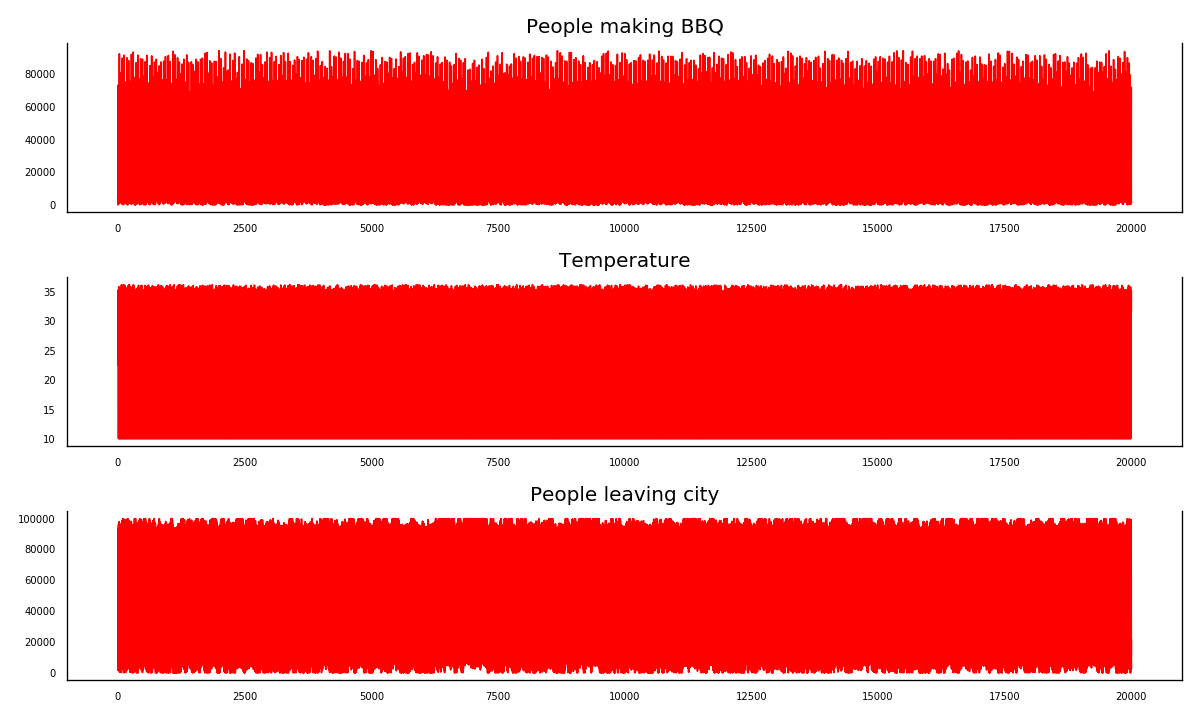

In [57]:
DATA_COLUMNS = ["People making BBQ","Temperature","People leaving city"]
data_var = data[DATA_COLUMNS]
cols = data_var.columns

df = data_var
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data_var = df[df.columns[i]]
    ax.plot(data_var, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,People making BBQ_x,Temperature_x,People leaving city_x
People making BBQ_y,1.0,0.0000,0.0000
Temperature_y,0.0,1.0000,0.2225
People leaving city_y,0.0,0.6678,1.0000


In [59]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
People making BBQ ::  11170.74  > 24.2761   =>   True
Temperature ::  3824.71   > 12.3212   =>   True
People leaving city ::  1.29      > 4.1296    =>   False


#### Autocorrelation

In [60]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

DATA_COLUMNS = ["People making BBQ","Temperature","People leaving city"]
data_new = data[DATA_COLUMNS]
data_new.head()

,People making BBQ,Temperature,People leaving city
0,0,22.628528,18916
1,46132,28.763520,37587
2,57374,33.753462,55974
3,33698,35.240134,74725
4,17216,34.670493,93760


<IPython.core.display.Javascript object>


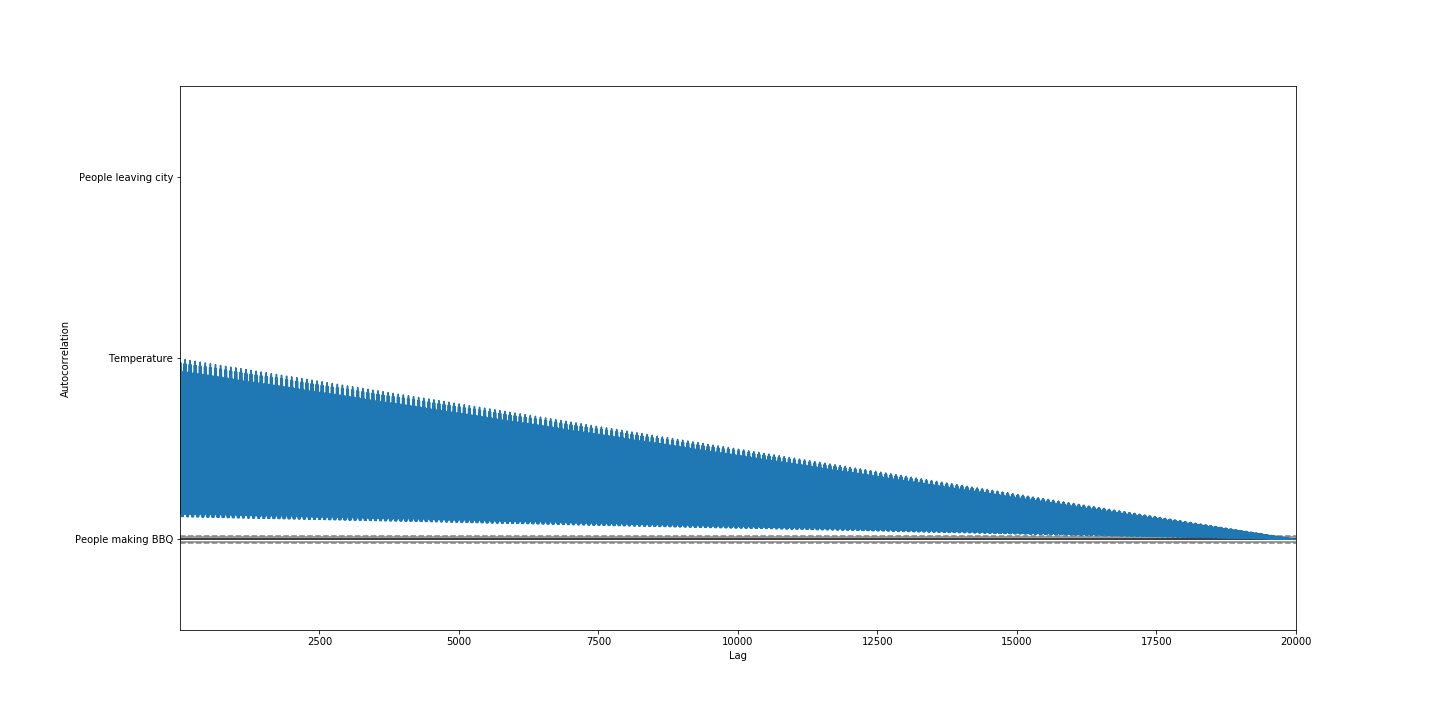

In [61]:
plt.figure(figsize=(20,10))
autocorrelation_plot(data_new)
plt.show()

### VAR implementation

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.var_model import VAR

import warnings
warnings.filterwarnings('ignore')

DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
data_v = data[DATA_COLUMNS]
cols = data_v.columns
    
comparison = data_v[["People making BBQ"]].copy()
bbq_col = []

for i in range(0,len(data_v)):
    if(i<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:i]
    
    valid = data_v.iloc[i]
    
    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)
    
    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,3):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    bbq_col.append(pred.iloc[0][0])


comparison.insert(1, "People making BBQ predicted", bbq_col)

print(' "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(comparison["People making BBQ"] - comparison["People making BBQ predicted"]))))

 "People making BBQ" mean absolute error: 25793.57018314312


In [70]:
def arimaModel(n_samples, data):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.vector_ar.var_model import VAR

    import warnings
    warnings.filterwarnings('ignore')
    
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    data_v = data[DATA_COLUMNS]
    cols = data_v.columns
        
    if(n_samples<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:n_samples]

    valid = data_v.iloc[n_samples]

    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)

    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,6):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    return pred.iloc[0][0]

In [9]:
def arimaModelv2( n_samples, DATA_COLUMNS,data):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.vector_ar.var_model import VAR

    import warnings
    warnings.filterwarnings('ignore')
    
    data_v = data[DATA_COLUMNS]
    cols = data_v.columns
    
    if(n_samples<3): train = data_v.iloc[:3]
    else: train = data_v.iloc[:n_samples]

    valid = data_v.iloc[n_samples]

    model = VAR(endog=train)
    model_fit = model.fit()

    # make prediction on validation
    prediction = model_fit.forecast(model_fit.y, steps=1)

    pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
    for j in range(0,len(DATA_COLUMNS)):
        for i in range(0, len(prediction)):
            pred.iloc[i][j] = prediction[i][j]
    
    return pred.iloc[0][1]

In [71]:
def change_arima(lag):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    from statsmodels.tsa.vector_ar.var_model import VAR

    import warnings
    warnings.filterwarnings('ignore')

    comparison = data_v[["People making BBQ"]].copy()
    bbq_col = []

    for i in range(0,len(data_v)):
        if(i<3): train = data_v.iloc[:3]
        else: 
            train = data_v.iloc[:i]
            if(i>lag):
                train = train.iloc[-lag:]

        valid = data_v.iloc[i]
        model = VAR(endog=train)
        model_fit = model.fit()

        # make prediction on validation
        prediction = model_fit.forecast(model_fit.y, steps=1)

        pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
        for j in range(0,3):
            for i in range(0, len(prediction)):
               pred.iloc[i][j] = prediction[i][j]

        bbq_col.append(pred.iloc[0][0])

    comparison.insert(1, "People making BBQ predicted", bbq_col)
    print(lag)
    print(' "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(comparison["People making BBQ"] - comparison["People making BBQ predicted"]))))

In [72]:
for i in range(4,2500,10):
    change_arima(i)

4
 "People making BBQ" mean absolute error: 25792.575053735607
14
 "People making BBQ" mean absolute error: 25793.43311654204
24
 "People making BBQ" mean absolute error: 25793.56049481917
34
 "People making BBQ" mean absolute error: 25793.544533831286
44
 "People making BBQ" mean absolute error: 25793.565358470347
54
 "People making BBQ" mean absolute error: 25793.628410520752
64
 "People making BBQ" mean absolute error: 25793.61641722706
74
 "People making BBQ" mean absolute error: 25793.552519944915
84
 "People making BBQ" mean absolute error: 25793.545685698096
94
 "People making BBQ" mean absolute error: 25793.570281234075
104
 "People making BBQ" mean absolute error: 25793.555972179143
114
 "People making BBQ" mean absolute error: 25793.579096584257
124
 "People making BBQ" mean absolute error: 25793.562543110573
134
 "People making BBQ" mean absolute error: 25793.574250574526
144
 "People making BBQ" mean absolute error: 25793.589974731414
154
 "People making BBQ" mean absolute 

1274
 "People making BBQ" mean absolute error: 25793.57237430808
1284
 "People making BBQ" mean absolute error: 25793.572424272435
1294
 "People making BBQ" mean absolute error: 25793.57149849752
1304
 "People making BBQ" mean absolute error: 25793.572854113016
1314
 "People making BBQ" mean absolute error: 25793.573953340136
1324
 "People making BBQ" mean absolute error: 25793.575129038523
1334
 "People making BBQ" mean absolute error: 25793.57274671373
1344
 "People making BBQ" mean absolute error: 25793.572920814553
1354
 "People making BBQ" mean absolute error: 25793.574113491537
1364
 "People making BBQ" mean absolute error: 25793.57199646888
1374
 "People making BBQ" mean absolute error: 25793.572684465216
1384
 "People making BBQ" mean absolute error: 25793.571905487875
1394
 "People making BBQ" mean absolute error: 25793.572915541477
1404
 "People making BBQ" mean absolute error: 25793.57376137994
1414
 "People making BBQ" mean absolute error: 25793.5735205349
1424
 "People mak

## Plotting the predictions

In [105]:
x_time = np.arange(0, len(data)*5, 5).tolist() # Create x_time every each 5 minutes

<IPython.core.display.Javascript object>


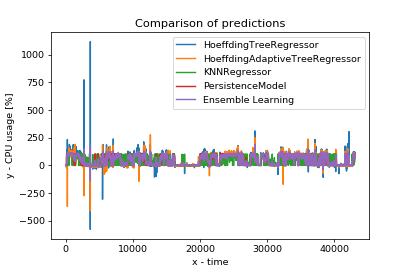

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure() 
plt.plot(x_time,y_pred_ht_reg, label = "HoeffdingTreeRegressor")
plt.plot(x_time,y_pred_hat_reg, label = "HoeffdingAdaptiveTreeRegressor")
plt.plot(x_time,y_pred_knn, label = "KNNRegressor")
plt.plot(x_time,y_pred_pers_model, label = "PersistenceModel")
plt.plot(x_time,y_pred_ensem, label = "Ensemble Learning")
plt.xlabel('x - time')
plt.ylabel('y - CPU usage [%]')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

### Plotting the predictions [First 10 values]

<IPython.core.display.Javascript object>


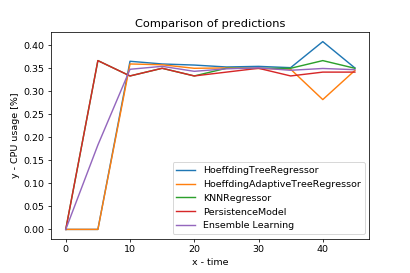

In [108]:
import matplotlib.pyplot as plt

x_time = x_time[:10]
fig = plt.figure() 
plt.plot(x_time,y_pred_ht_reg[:10], label = "HoeffdingTreeRegressor")
plt.plot(x_time,y_pred_hat_reg[:10], label = "HoeffdingAdaptiveTreeRegressor")
plt.plot(x_time,y_pred_knn[:10], label = "KNNRegressor")
plt.plot(x_time,y_pred_pers_model[:10], label = "PersistenceModel")
plt.plot(x_time,y_pred_ensem[:10], label = "Ensemble Learning")
plt.xlabel('x - time')
plt.ylabel('y - CPU usage [%]')
plt.title('Comparison of predictions')
plt.legend()
plt.show()

## Ensemble learning

### Base ensemble case

In [86]:
def ensemble_learning(data):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np

    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)

    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()

    y_previo = 0

    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_previo
        y_pred_arima_model[n_samples] = arimaModelv2(n_samples,DATA_COLUMNS,data)

        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]+y_pred_hat_reg[n_samples]+y_pred_knn[n_samples]
                                   +y_pred_pers_model[n_samples]+y_pred_arima_model[n_samples])/5

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1

    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [87]:
ensemble_learning(data) 

Ensemble learning "People making BBQ" mean absolute error: 9816.856842870893


In [166]:
# Create a subset for every value of the time_intervals
time_intervals = [5,10,15,30,60,1440]
for i in time_intervals:
    name_variable = "subset_" + str(i)
    locals()[name_variable] = take_values_time_intervals(i)
    print('Ensemble learning with {}'.format(name_variable))
    ensemble_learning(0, locals()[name_variable])
    ensemble_learning(1, locals()[name_variable]) 
    print()
    

Ensemble learning with subset_5
Ensemble learning "CPU usage [%]" mean absolute error: 7.627284622424709
Ensemble learning "Memory usage [%]" mean absolute error: 0.03313046508776159

Ensemble learning with subset_10
Ensemble learning "CPU usage [%]" mean absolute error: 8.22517679230004
Ensemble learning "Memory usage [%]" mean absolute error: 0.020266032852710284

Ensemble learning with subset_15
Ensemble learning "CPU usage [%]" mean absolute error: 4.1705373553733205
Ensemble learning "Memory usage [%]" mean absolute error: 0.015747006936898143

Ensemble learning with subset_30
Ensemble learning "CPU usage [%]" mean absolute error: 3.3052572064636365
Ensemble learning "Memory usage [%]" mean absolute error: 0.009008671461581593

Ensemble learning with subset_60
Ensemble learning "CPU usage [%]" mean absolute error: 1.4180782534638419
Ensemble learning "Memory usage [%]" mean absolute error: 0.00667367638060722

Ensemble learning with subset_1440
Ensemble learning "CPU usage [%]" me

### Prediction using the best algorithm of the previous step

In [88]:
def ensemble_learning_previous_step(data):
    '''
    The prediction is made by the best predictor from the previous iteration.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        import operator
        
        if(n_samples==0):
            y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]+y_pred_hat_reg[n_samples]+y_pred_knn[n_samples]+
                                       y_pred_pers_model[n_samples]+y_pred_arima_model[n_samples])/5
        else:
            y_pred_ensem[n_samples] = y_predictions[best_previous_step]
            best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1

    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [89]:
ensemble_learning_previous_step(data)

Ensemble learning "People making BBQ" mean absolute error: 1131.3618011606472


### Increase the weight to the best and decrease to the rest by constant

In [92]:
def ensemble_learning_weight_change(data, learning):
    '''
    The weight of the best predictor increases "learning" and the weight of the other predictors decreases 
    the same value among them.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()

        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
               
        for i in range(len(algorithm_weights)):
            if(i == best_previous_step): 
                algorithm_weights[i] += (learning)
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            else: 
                algorithm_weights[i] -= (learning/(len(algorithm_weights)-1))
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
        
        algorithm_weights /= sum(algorithm_weights)
                
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [93]:
for i in range(0,10):
    ensemble_learning_weight_change(data, i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 10091.669711772483
0.1
Ensemble learning "People making BBQ" mean absolute error: 604.7478039532388
0.2
Ensemble learning "People making BBQ" mean absolute error: 751.9553189813461
0.3
Ensemble learning "People making BBQ" mean absolute error: 882.0496012620184
0.4
Ensemble learning "People making BBQ" mean absolute error: 777.8206216942991
0.5
Ensemble learning "People making BBQ" mean absolute error: 1021.7433314414598
0.6
Ensemble learning "People making BBQ" mean absolute error: 1085.8322870030754
0.7
Ensemble learning "People making BBQ" mean absolute error: 1194.850472719727
0.8
Ensemble learning "People making BBQ" mean absolute error: 1222.77716745313
0.9
Ensemble learning "People making BBQ" mean absolute error: 1212.6988279199757


### Increase the weight to the best and decrease to the worst by a constant

In [94]:
def ensemble_learning_weight_change_different(data, learning):
    '''
    The weight of the best predictor increases "learning" and the worst predictor decreases 
    the same amount.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)
    
    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [95]:
for i in range(0,10):
    ensemble_learning_weight_change_different(data, i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 10129.441833037103
0.1
Ensemble learning "People making BBQ" mean absolute error: 553.0421011952384
0.2
Ensemble learning "People making BBQ" mean absolute error: 636.9515849519055
0.3
Ensemble learning "People making BBQ" mean absolute error: 799.062902240583
0.4
Ensemble learning "People making BBQ" mean absolute error: 410.6023836830504
0.5
Ensemble learning "People making BBQ" mean absolute error: 433.6118595517622
0.6
Ensemble learning "People making BBQ" mean absolute error: 932.8379272114466
0.7
Ensemble learning "People making BBQ" mean absolute error: 1131.461202196848
0.8
Ensemble learning "People making BBQ" mean absolute error: 985.4814221872613
0.9
Ensemble learning "People making BBQ" mean absolute error: 1082.7531837582624


### Increase the weight to the best and decrease to the worst and perhaps the others too

In [100]:
def ensemble_learning_weight_change_different_substract(data, learning):
    '''
    The weight of the best predictor increases "learning" and the worst predictor decreases 
    the same amount.
    In case the weight of the worst algorithm is less than "learning", then it will be decrease the remaining value among 
    the weight of the other algorithms without taking into account the best predictor.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np

    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [101]:
for i in range(0,10):
    ensemble_learning_weight_change_different_substract(data, i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 10036.541726811482
0.1
Ensemble learning "People making BBQ" mean absolute error: 547.3088981573345
0.2
Ensemble learning "People making BBQ" mean absolute error: 691.2623980339515
0.3
Ensemble learning "People making BBQ" mean absolute error: 683.8855308365719
0.4
Ensemble learning "People making BBQ" mean absolute error: 730.6084019890777
0.5
Ensemble learning "People making BBQ" mean absolute error: 864.8229108766602
0.6
Ensemble learning "People making BBQ" mean absolute error: 914.9071205365284
0.7
Ensemble learning "People making BBQ" mean absolute error: 948.0450287366065
0.8
Ensemble learning "People making BBQ" mean absolute error: 1177.63974769672
0.9
Ensemble learning "People making BBQ" mean absolute error: 1133.2337333979142


### Feature Selection Techniques

In [102]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Setup a data stream
DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
LABEL_COLUMN = "People making BBQ" 
TIME_COLUMN = "Timestamp"

# Sort data by Timestamp
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

bestfeatures = SelectKBest(score_func=f_regression, k=3)
print(bestfeatures)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

SelectKBest(k=3, score_func=<function f_regression at 0x0000021C08DE5B88>)
                 Specs         Score
0          Temperature  7.081290e+03
1  People leaving city  2.630502e+03
2    People making BBQ -4.503149e+19


In [103]:
# Setup a data stream
DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
LABEL_COLUMN = "People making BBQ" 
TIME_COLUMN = "Timestamp"

# Sort data by Timestamp
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.02922605 0.01509952 0.95567443]


<IPython.core.display.Javascript object>


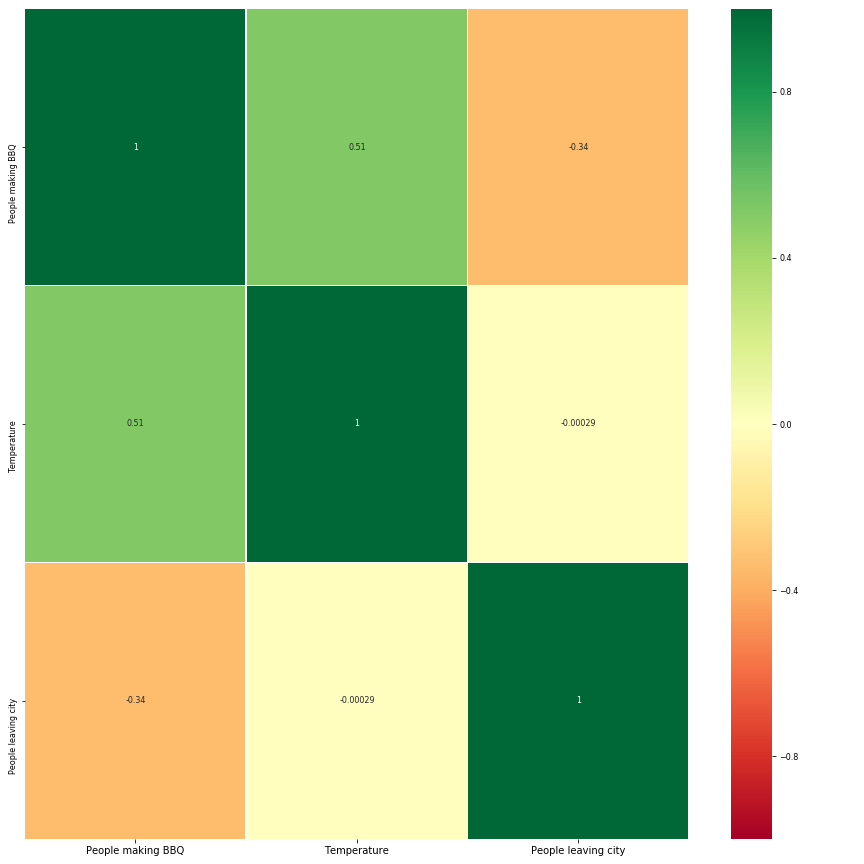

In [63]:
import seaborn as sns

# Setup a data stream
DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
LABEL_COLUMN = "People making BBQ" 
TIME_COLUMN = "Timestamp"

# Sort data by Timestamp
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]


corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map


g=sns.heatmap(data[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
g.figure.tight_layout()
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 10)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('output2.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


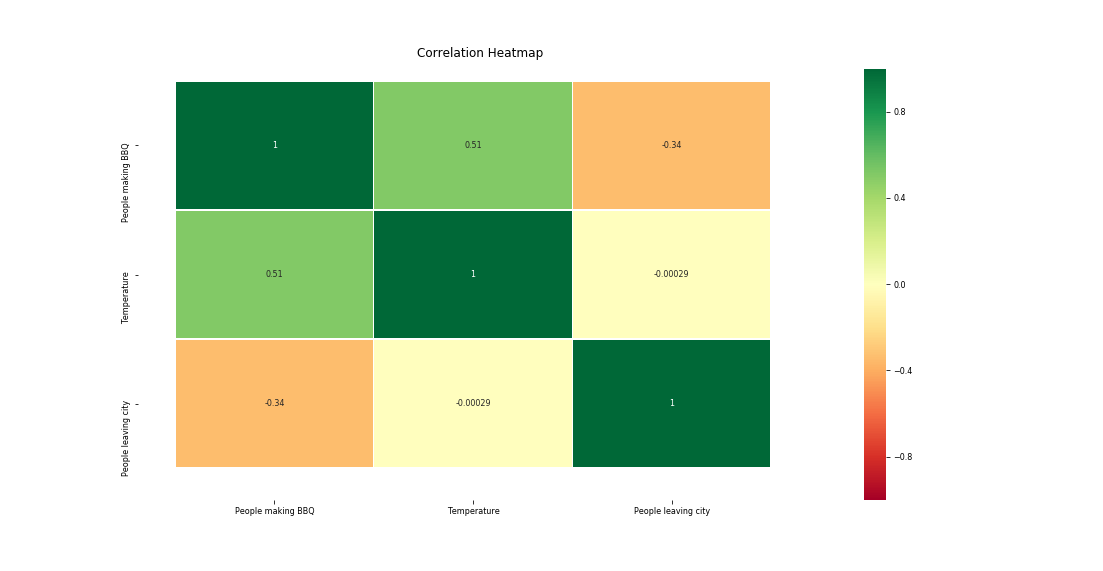

In [58]:
import seaborn as sns

# Setup a data stream
DATA_COLUMNS = ["Temperature","People leaving city", "People making BBQ" ]
LABEL_COLUMN = "People making BBQ" 
TIME_COLUMN = "Timestamp"

# Sort data by Timestamp
data = data.sort_values(by=TIME_COLUMN)

# Get X, y and time
X = data[DATA_COLUMNS]
y = data[LABEL_COLUMN]

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,5))
#plot heat map

g=sns.heatmap(data[top_corr_features].corr(), vmin=-1, vmax=1, annot=True,cmap="RdYlGn", linewidth=0.5)
g.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('output.png', dpi=300, bbox_inches='tight')

#### Ensemble learning with feature selection

In [118]:
def ensemble_learning_weight_change_feature_selection(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning only uses 2 columns as DATA_COLUMNS, the ones that were the most important in the
    feature-selection.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
       
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by Timestamp
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [119]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(data,i/10)
    ensemble_learning_weight_change_different_substract(data, i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 5758.458243313791
0.0
Ensemble learning "People making BBQ" mean absolute error: 10078.081871370201
0.1
Ensemble learning "People making BBQ" mean absolute error: 107.01869158985077
0.1
Ensemble learning "People making BBQ" mean absolute error: 540.533967666063
0.2
Ensemble learning "People making BBQ" mean absolute error: 109.92377279606406
0.2
Ensemble learning "People making BBQ" mean absolute error: 606.5630403653036
0.3
Ensemble learning "People making BBQ" mean absolute error: 123.58565328851785
0.3
Ensemble learning "People making BBQ" mean absolute error: 716.1019873741205
0.4
Ensemble learning "People making BBQ" mean absolute error: 128.09400331546476
0.4
Ensemble learning "People making BBQ" mean absolute error: 843.6681297529135
0.5
Ensemble learning "People making BBQ" mean absolute error: 148.2088347765368
0.5
Ensemble learning "People making BBQ" mean absolute error: 1008.9281644111132
0.6
Ensemble learning "

In [121]:
def ensemble_learning_weight_change_feature_selection_two(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning only uses 2 columns as DATA_COLUMNS.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["People leaving city", "People making BBQ" ]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = 0
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
        
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples, DATA_COLUMNS, data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                
        import operator
        
        best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                worst_value = results[i]
                worst_previous_step = i            
            
        if(worst_previous_step!=best_previous_step):
            algorithm_weights[best_previous_step] += (learning)
            if(algorithm_weights[worst_previous_step]<learning):
                worst_weight = algorithm_weights[worst_previous_step]
                algorithm_weights[worst_previous_step] = 0.0
                list_pos_with_values = []
                for i in range(len(results)):
                    if(i!=best_previous_step and algorithm_weights[i]>0.0):
                        list_pos_with_values.append(i)
                for i in list_pos_with_values:
                    algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
            else:
                algorithm_weights[worst_previous_step] -= (learning)
           
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        

        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [122]:
for i in range(0,10):
    ensemble_learning_weight_change_feature_selection(data,i/10)
    ensemble_learning_weight_change_different_substract(data, i/10)
    ensemble_learning_weight_change_feature_selection_two(data,i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 5930.282458302711
0.0
Ensemble learning "People making BBQ" mean absolute error: 9925.157869626786
0.0
Ensemble learning "People making BBQ" mean absolute error: 4752.8888815215405
0.1
Ensemble learning "People making BBQ" mean absolute error: 106.417630074899
0.1
Ensemble learning "People making BBQ" mean absolute error: 536.1017623380898
0.1
Ensemble learning "People making BBQ" mean absolute error: 579.0072724105215
0.2
Ensemble learning "People making BBQ" mean absolute error: 104.09640062769782
0.2
Ensemble learning "People making BBQ" mean absolute error: 577.5740032556238
0.2
Ensemble learning "People making BBQ" mean absolute error: 309.12831647380034
0.3
Ensemble learning "People making BBQ" mean absolute error: 117.29476540947992
0.3
Ensemble learning "People making BBQ" mean absolute error: 718.337684560434
0.3
Ensemble learning "People making BBQ" mean absolute error: 802.543012833142
0.4
Ensemble learning "Peop

###  Ensemble learning modifying weights of more than one algorithm

In [20]:
def ensemble_learning_weight_change_multiple_modification(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_feature_selection".
    However, this ensemble learning modifies the weight of more than one algorithm in the event that there are
    more than one that are equally accurate.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
                       
        import operator
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        for i in range(1, len(results)):
            if(results[i] < best_value[0]):
                best_value.clear()
                best_previous_step.clear()
                best_value.append(results[i])
                best_previous_step.append(i)
            elif(results[i] == best_value[0]):
                best_value.append(results[i])
                best_previous_step.append(i)
                
        for best_step in best_previous_step:
            
            for i in range(len(results)):
                if((results[i] >= worst_value) and (algorithm_weights[i]>0)):
                    worst_value = results[i]
                    worst_previous_step = i            

            if(worst_previous_step!=best_step):
                algorithm_weights[best_step] += (learning)
                if(algorithm_weights[worst_previous_step]<learning):
                    worst_weight = algorithm_weights[worst_previous_step]
                    algorithm_weights[worst_previous_step] = 0.0
                    list_pos_with_values = []
                    for i in range(len(results)):
                        if(i!=best_step and algorithm_weights[i]>0.0):
                            list_pos_with_values.append(i)
                    for i in list_pos_with_values:
                        algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                else:
                    algorithm_weights[worst_previous_step] -= (learning)
                
        for i in range(len(algorithm_weights)):
            if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
            if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0
                    
        algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [21]:
def ensemble_learning_weight_change_multiple_modification_equality(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification".
    However, this ensemble learning does not modify the weights in the first iteration
    and in the case of decreasing the worst algorithm, between two that are equally bad 
    is prioritize to reduce the one with the most weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [24]:
for i in range(0,10):
    ensemble_learning_weight_change_multiple_modification(data,i/10)
    ensemble_learning_weight_change_multiple_modification_equality(data,i/10)

0.0


C:\Users\agustic\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ensemble learning "People making BBQ" mean absolute error: 5676.396533208192
0.0
Ensemble learning "People making BBQ" mean absolute error: 5732.056948720758
0.1
Ensemble learning "People making BBQ" mean absolute error: 105.36176967197282
0.1
Ensemble learning "People making BBQ" mean absolute error: 101.36928522279267
0.2
Ensemble learning "People making BBQ" mean absolute error: 115.44915793445027
0.2
Ensemble learning "People making BBQ" mean absolute error: 118.4085590747613
0.3
Ensemble learning "People making BBQ" mean absolute error: 122.30872177476077
0.3
Ensemble learning "People making BBQ" mean absolute error: 121.80591939886955
0.4
Ensemble learning "People making BBQ" mean absolute error: 137.55581248842844
0.4
Ensemble learning "People making BBQ" mean absolute error: 138.23497789271772
0.5
Ensemble learning "People making BBQ" mean absolute error: 130.61341326496458
0.5
Ensemble learning "People making BBQ" mean absolute error: 140.50338301990507
0.6
Ensemble learning "

### Ensemble learning with multiple KNN

In [10]:
def multiple_knn(data, learning, maximum):
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    ## Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")
    
    max_samples = num_rows
    
    creation_counter = 0
    for i in range(1,maximum+1,5):    
        name_variable = "knn_" + str(i)
        locals()[name_variable]= KNNRegressor(n_neighbors = i)
        creation_counter += 1
        name_variable = "y_pred_knn_" + str(i)
        locals()[name_variable] = np.zeros(max_samples)
        
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    
    total_number_models = 4+creation_counter
    y_predictions = np.zeros(total_number_models)
    algorithm_weights = np.full( total_number_models,1/total_number_models)
    
        
    n_samples = 0
    correct_cnt = 0
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[2] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[3] = arimaModelv2(n_samples,DATA_COLUMNS, data)
        
        begin = 4
        for i in range(1,maximum+1,5):    
            name_variable = "y_pred_knn_" + str(i) +"[n_samples]"
            name_algorithm = "knn_" + str(i)
            locals()[name_variable] = y_predictions[begin] = locals()[name_algorithm].predict(X)[0]
            begin += 1
        
        static_models = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_pers_model[n_samples]*algorithm_weights[2])+(y_pred_arima_model[n_samples]*algorithm_weights[3])
                
        begin = 4
        for i in range(1,maximum+1,5):     
            name_variable = "y_pred_knn_" + str(i) +"[n_samples]"
            static_models += (locals()[name_variable] * algorithm_weights[begin])
            begin += 1
        
        y_pred_ensem[n_samples] = static_models
        
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
    
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)
        
        for i in range(1,maximum+1,5):    
            name_variable = "knn_" + str(i)
            locals()[name_variable].fit(X,y)
        
        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

    

In [11]:
for i in range(0,10):
    multiple_knn(data,i/10,26)

0.0


C:\Users\agustic\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ensemble learning "People making BBQ" mean absolute error: 2919.8771559422603
0.1
Ensemble learning "People making BBQ" mean absolute error: 68.02237158382127
0.2
Ensemble learning "People making BBQ" mean absolute error: 80.84319141660633
0.3
Ensemble learning "People making BBQ" mean absolute error: 93.09601973727848
0.4
Ensemble learning "People making BBQ" mean absolute error: 101.3502692136805
0.5
Ensemble learning "People making BBQ" mean absolute error: 109.48873398605099
0.6
Ensemble learning "People making BBQ" mean absolute error: 106.82171643861555
0.7
Ensemble learning "People making BBQ" mean absolute error: 122.44997209403326
0.8
Ensemble learning "People making BBQ" mean absolute error: 115.53294810518983
0.9
Ensemble learning "People making BBQ" mean absolute error: 133.84133711284898


###  Results in real time 

In [13]:
def ensemble_learning_weight_change_multiple_modification_equality_show(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification".
    However, this ensemble learning does not modify the weights in the first iteration
    and in the case of decreasing the worst algorithm, between two that are equally bad 
    is prioritize to reduce the one with the most weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    from skmultiflow.evaluation import EvaluatePrequential
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    metrics = ['mean_square_error', 'mean_absolute_error', 'true_vs_predicted']
    evaluator = EvaluatePrequential(n_wait=1,max_samples=num_rows,metrics=metrics, pretrain_size=1, show_plot=True)

    evaluator.evaluate(stream=stream, model=[ht_reg, hat_reg, knn], model_names=["HTR", "HAT", "KNN"])

    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])
        +(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

<IPython.core.display.Javascript object>


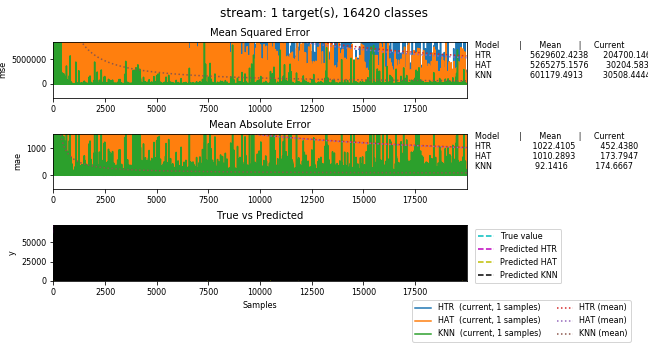

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [1179.68s]
Processed samples: 20000
Mean performance:
HTR - MSE          : 5629602.4238
HTR - MAE          : 1022.410479
HAT - MSE          : 5265275.1576
HAT - MAE          : 1010.289327
KNN - MSE          : 601179.4913
KNN - MAE          : 92.141582
0.05
Ensemble learning "People making BBQ" mean absolute error: 72.2083289876929


In [127]:
ensemble_learning_weight_change_multiple_modification_equality_show(data,0.05)

###  Ensemble learning modifying weights with percentage

In [128]:
def ensemble_learning_percentage_weight(data, learning_percentage):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_different_substract".
    However, this ensemble learning uses percentages when increasing or decreasing the weight of the algorithms.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])

    # Sort data by time
    data = data.sort_values(by=TIME_COLUMN)
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning_percentage)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    learning = algorithm_weights[best_step]*learning_percentage
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [129]:
def ensemble_learning_percentage_weight_diff(data, learning_percentage):
    '''
    The same ensemble learning = "ensemble_learning_percentage_weight".
    However, this ensemble learning increases a constant value to the best predictor when 
    it is  wanted to increase the algorithm that has a weight of 0.
    This is due to not be able to increase a porcentage of its weight.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
   
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    
    print(learning_percentage)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
    
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    learning = algorithm_weights[best_step]*learning_percentage
                    if(learning==0): learning = 0.05
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [130]:
for i in range(0,10):
    ensemble_learning_percentage_weight(data,i/10)
    ensemble_learning_percentage_weight_diff(data,i/10)

0.0
Ensemble learning "People making BBQ" mean absolute error: 5726.141747360079
0.0
Ensemble learning "People making BBQ" mean absolute error: 102.74148445619736
0.1
Ensemble learning "People making BBQ" mean absolute error: 100.82568674229809
0.1
Ensemble learning "People making BBQ" mean absolute error: 99.4063595830411
0.2
Ensemble learning "People making BBQ" mean absolute error: 93.02894397013819
0.2
Ensemble learning "People making BBQ" mean absolute error: 99.65117740825858
0.3
Ensemble learning "People making BBQ" mean absolute error: 97.37417967323658
0.3
Ensemble learning "People making BBQ" mean absolute error: 104.79491653030378
0.4
Ensemble learning "People making BBQ" mean absolute error: 95.06064841566602
0.4
Ensemble learning "People making BBQ" mean absolute error: 97.13281258887797
0.5
Ensemble learning "People making BBQ" mean absolute error: 98.20761280943859
0.5
Ensemble learning "People making BBQ" mean absolute error: 104.1504976259196
0.6
Ensemble learning "Peo

## 4 Types of goals

### Nail the maximum number of possible cases

In [131]:
def ensemble_learning_nail_cases(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict the exact value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=2):
            count += 1
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [132]:
for i in range(0,10):
    ensemble_learning_nail_cases(data,i/10)

0.0
426
Ensemble learning "People making BBQ" mean absolute error: 5631.150046470091
0.1
18439
Ensemble learning "People making BBQ" mean absolute error: 107.56224781117264
0.2
18327
Ensemble learning "People making BBQ" mean absolute error: 111.8561094708107
0.3
18352
Ensemble learning "People making BBQ" mean absolute error: 119.7013523578285
0.4
18340
Ensemble learning "People making BBQ" mean absolute error: 125.28162618982056
0.5
18192
Ensemble learning "People making BBQ" mean absolute error: 134.1891622634915
0.6
18259
Ensemble learning "People making BBQ" mean absolute error: 137.6169511369028
0.7
18155
Ensemble learning "People making BBQ" mean absolute error: 140.7701357891253
0.8
18217
Ensemble learning "People making BBQ" mean absolute error: 179.6191943519354
0.9
18026
Ensemble learning "People making BBQ" mean absolute error: 164.19333701202265


##  Over-optimize

In [133]:
def ensemble_learning_higher_count(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict above the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])>=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [134]:
for i in range(0,10):
    ensemble_learning_higher_count(data,i/10)

0.0
11236
Ensemble learning "People making BBQ" mean absolute error: 5956.283209364409
0.1
10163
Ensemble learning "People making BBQ" mean absolute error: 106.45622182776692
0.2
10175
Ensemble learning "People making BBQ" mean absolute error: 107.50367615240764
0.3
10121
Ensemble learning "People making BBQ" mean absolute error: 133.09320499512066
0.4
10147
Ensemble learning "People making BBQ" mean absolute error: 141.53757106232732
0.5
10146
Ensemble learning "People making BBQ" mean absolute error: 135.65373029864688
0.6
10186
Ensemble learning "People making BBQ" mean absolute error: 153.8829140353566
0.7
10218
Ensemble learning "People making BBQ" mean absolute error: 139.37823061093712
0.8
10153
Ensemble learning "People making BBQ" mean absolute error: 165.86704085836482
0.9
10080
Ensemble learning "People making BBQ" mean absolute error: 173.90051116227383


In [135]:
def ensemble_learning_higher_cases( data, learning):
    '''
    The same ensemble learning = "ensemble_learning_higher_count".
    However, this ensemble learning will better value the higher predictions than the lower ones when modifying weights.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])>=0):
            count += 1
            
        import operator
   
        worst_previous_step = -1   
        worst_value = 0
        results = y_predictions-y[0]
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if((results[i]>0) and (results[i] < best_value[0])):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif( (results[i]>0)  and results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            if(best_value[0] < 0):
                best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
                best_prev_step = []
                best_prev_step.append(best_previous_step)
                best_previous_step = best_prev_step
            
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [136]:
for i in range(0,10):
    ensemble_learning_higher_cases(data,i/10)

0.0
11179
Ensemble learning "People making BBQ" mean absolute error: 6032.621497830754
0.1
10760
Ensemble learning "People making BBQ" mean absolute error: 216.58751105848256
0.2
10334
Ensemble learning "People making BBQ" mean absolute error: 643.0517121047603
0.3
10537
Ensemble learning "People making BBQ" mean absolute error: 1197.8810893807981
0.4
9704
Ensemble learning "People making BBQ" mean absolute error: 371.9572971257858
0.5
10020
Ensemble learning "People making BBQ" mean absolute error: 1630.1036565416098
0.6
10850
Ensemble learning "People making BBQ" mean absolute error: 1247.3279629359645
0.7
10889
Ensemble learning "People making BBQ" mean absolute error: 407.5475342084188
0.8
10846
Ensemble learning "People making BBQ" mean absolute error: 277.8851187323598
0.9
10725
Ensemble learning "People making BBQ" mean absolute error: 716.4375899913514


## Optimize

In [137]:
def ensemble_learning_optimize_count(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict the value 5% above or below.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=5):
            count += 1
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [138]:
for i in range(0,10):
    ensemble_learning_optimize_count(data,i/10)

0.0
1743
Ensemble learning "People making BBQ" mean absolute error: 5874.5715782398465
0.1
19048
Ensemble learning "People making BBQ" mean absolute error: 92.42931875345717
0.2
19029
Ensemble learning "People making BBQ" mean absolute error: 115.50580315216854
0.3
18984
Ensemble learning "People making BBQ" mean absolute error: 131.27984759276114
0.4
18996
Ensemble learning "People making BBQ" mean absolute error: 141.66286277961026
0.5
19010
Ensemble learning "People making BBQ" mean absolute error: 133.56588864962455
0.6
18901
Ensemble learning "People making BBQ" mean absolute error: 143.53035340394004
0.7
19030
Ensemble learning "People making BBQ" mean absolute error: 80.3892945011933
0.8
18879
Ensemble learning "People making BBQ" mean absolute error: 173.56960362988846
0.9
18747
Ensemble learning "People making BBQ" mean absolute error: 165.64732257247908


In [139]:
def ensemble_learning_optimize_count_modification(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will also increase the weight to the algorithms that are % above or below the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
     # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)
    
    y_true = np.zeros(max_samples)
    count = 0
    nail_algorithms = []
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((abs(y_pred_ensem[n_samples]-y[0])/y[0])*100<=5):
            count += 1
            
        
            
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        for i in range(len(results)):
            if((results[i]/y[0])*100<=2):
                nail_algorithms.append(i)
                
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            for i in nail_algorithms:
                algorithm_weights[i] += learning/8
            
            nail_algorithms.clear()
            
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))
    

In [140]:
for i in range(0,10):
    ensemble_learning_optimize_count_modification(data,i/10)

0.0
1620
Ensemble learning "People making BBQ" mean absolute error: 5806.719178552731
0.1
19060
Ensemble learning "People making BBQ" mean absolute error: 106.7598571736365
0.2
19029
Ensemble learning "People making BBQ" mean absolute error: 111.13348280226933
0.3
18995
Ensemble learning "People making BBQ" mean absolute error: 125.50091059490366
0.4
18975
Ensemble learning "People making BBQ" mean absolute error: 138.16286959919873
0.5
18911
Ensemble learning "People making BBQ" mean absolute error: 149.1401302550057
0.6
18813
Ensemble learning "People making BBQ" mean absolute error: 151.7994371446345
0.7
18925
Ensemble learning "People making BBQ" mean absolute error: 139.20928948659102
0.8
18853
Ensemble learning "People making BBQ" mean absolute error: 114.48586797975037
0.9
18853
Ensemble learning "People making BBQ" mean absolute error: 171.0353119541601


## Minimize

In [141]:
def ensemble_learning_minimum_count(data, learning):
    '''
    The same ensemble learning = "ensemble_learning_weight_change_multiple_modification_equality".
    However, this ensemble learning will count how many times we predict below the real value.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])<=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = abs(y_predictions-y[0])
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if(results[i] < best_value[0]):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif(results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)

            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 


                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [142]:
for i in range(0,10):
    ensemble_learning_minimum_count(data,i/10)

0.0
8568
Ensemble learning "People making BBQ" mean absolute error: 5626.006464139545
0.1
10380
Ensemble learning "People making BBQ" mean absolute error: 100.78319620537616
0.2
10410
Ensemble learning "People making BBQ" mean absolute error: 111.05309182602225
0.3
10381
Ensemble learning "People making BBQ" mean absolute error: 133.55279637942908
0.4
10394
Ensemble learning "People making BBQ" mean absolute error: 134.05602296496988
0.5
10310
Ensemble learning "People making BBQ" mean absolute error: 137.75544449835292
0.6
10421
Ensemble learning "People making BBQ" mean absolute error: 140.75448801814196
0.7
10472
Ensemble learning "People making BBQ" mean absolute error: 156.89545439937095
0.8
10334
Ensemble learning "People making BBQ" mean absolute error: 181.25924132145582
0.9
10298
Ensemble learning "People making BBQ" mean absolute error: 154.25006829515436


In [143]:
def ensemble_learning_minimum_cases( data, learning):
    '''
    The same ensemble learning = "ensemble_learning_minimum_count".
    However, this ensemble learning will better value the lower predictions than the lower ones when modifying weights.
    '''
    from skmultiflow.data import RegressionGenerator
    from skmultiflow.lazy import KNNRegressor
    from skmultiflow.trees import HoeffdingTreeRegressor
    from skmultiflow.trees import HoeffdingAdaptiveTreeRegressor
    from skmultiflow.data import DataStream
    import numpy as np
    import operator
    
    # Setup a data stream
    DATA_COLUMNS = ["Temperature","People making BBQ"]
    LABEL_COLUMN = "People making BBQ" 
    TIME_COLUMN = "Timestamp"

    # Convert time column to datetime
    data[TIME_COLUMN] = pd.to_datetime(data[TIME_COLUMN])
    
    # Get X, y and time
    X = data[DATA_COLUMNS].values
    y = data[LABEL_COLUMN].values
    time = data[TIME_COLUMN].values

    stream = DataStream(X, y, name="stream")

    #best_k = knn_best_n_neighbors(10,data)

    knn = KNNRegressor(n_neighbors = 6)
    ht_reg = HoeffdingTreeRegressor()
    hat_reg = HoeffdingAdaptiveTreeRegressor()
    
    best_previous_step = []
    best_value = []
    y_predictions = np.zeros(5)
    algorithm_weights = np.full(5,0.20)
        
    n_samples = 0
    correct_cnt = 0
    max_samples = num_rows
    y_previo = 0

    y_pred_ensem = np.zeros(max_samples)
    y_pred_knn = np.zeros(max_samples)
    y_pred_ht_reg = np.zeros(max_samples)
    y_pred_hat_reg= np.zeros(max_samples)
    y_pred_pers_model = np.zeros(max_samples)
    y_pred_arima_model = np.zeros(max_samples)

    y_true = np.zeros(max_samples)
    count = 0
    
    print(learning)

    while n_samples < max_samples and stream.has_more_samples():
        
        X, y = stream.next_sample()
        
        y_true[n_samples]= y[0]

        y_pred_ht_reg[n_samples] = y_predictions[0] = ht_reg.predict(X)[0]
        y_pred_hat_reg[n_samples] = y_predictions[1] = hat_reg.predict(X)[0]
        y_pred_knn[n_samples] = y_predictions[2] = knn.predict(X)[0]
        y_pred_pers_model[n_samples] = y_predictions[3] = y_previo
        y_pred_arima_model[n_samples] = y_predictions[4] = arimaModelv2(n_samples,DATA_COLUMNS,data)
        
        y_pred_ensem[n_samples] = (y_pred_ht_reg[n_samples]*algorithm_weights[0])+(y_pred_hat_reg[n_samples]*algorithm_weights[1])+(y_pred_knn[n_samples]*algorithm_weights[2])+(y_pred_pers_model[n_samples]*algorithm_weights[3])+(y_pred_arima_model[n_samples]*algorithm_weights[4])
        
        if((y_pred_ensem[n_samples]-y[0])<=0):
            count += 1
   
        worst_previous_step = -1   
        worst_value = 0
        results = y_predictions-y[0]
        
        best_value.append(results[0])
        best_previous_step.append(0) 
        
        if(n_samples>0):
            for i in range(1, len(results)):
                if((results[i]<0) and (results[i] > best_value[0])):
                    best_value.clear()
                    best_previous_step.clear()
                    best_value.append(results[i])
                    best_previous_step.append(i)
                elif( (results[i]<0)  and results[i] == best_value[0]):
                    best_value.append(results[i])
                    best_previous_step.append(i)
            
            if(best_value[0] > 0):
                best_previous_step, value = min(enumerate(abs(y_predictions-y[0])), key=operator.itemgetter(1))
                best_prev_step = []
                best_prev_step.append(best_previous_step)
                best_previous_step = best_prev_step
                
            for best_step in best_previous_step:
                for i in range(len(results)):
                    if (algorithm_weights[i]>0):
                        if(results[i] > worst_value):
                            worst_value = results[i]
                            worst_previous_step = i
                        elif((results[i] == worst_value) and (algorithm_weights[i]>algorithm_weights[worst_previous_step])):
                            worst_value = results[i]
                            worst_previous_step = i 

                if(worst_previous_step!=best_step):
                    algorithm_weights[best_step] += (learning)
                    if(algorithm_weights[worst_previous_step]<learning):
                        worst_weight = algorithm_weights[worst_previous_step]
                        algorithm_weights[worst_previous_step] = 0.0
                        list_pos_with_values = []
                        for i in range(len(results)):
                            if(i!=best_step and algorithm_weights[i]>0.0):
                                list_pos_with_values.append(i)
                        for i in list_pos_with_values:
                            algorithm_weights[i] -= (learning-worst_weight)/len(list_pos_with_values)
                    else:
                        algorithm_weights[worst_previous_step] -= (learning)

            for i in range(len(algorithm_weights)):
                if(algorithm_weights[i]>1.0): algorithm_weights[i] = 1.0
                if(algorithm_weights[i]<0.0): algorithm_weights[i] = 0.0

            algorithm_weights /= sum(algorithm_weights)
        
        best_value.clear()
        best_previous_step.clear()
        
        knn.partial_fit(X, y)
        ht_reg.partial_fit(X, y)
        hat_reg.partial_fit(X, y)

        y_previo = y[0]
        n_samples += 1
    
    print(count)
    print('Ensemble learning "People making BBQ" mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred_ensem))))

In [144]:
for i in range(0,10):
    ensemble_learning_minimum_cases(data,i/10)

0.0
8642
Ensemble learning "People making BBQ" mean absolute error: 5658.569766806803
0.1
10569
Ensemble learning "People making BBQ" mean absolute error: 133.41771286186147
0.2
11050
Ensemble learning "People making BBQ" mean absolute error: 845.4719356820171
0.3
11109
Ensemble learning "People making BBQ" mean absolute error: 548.0672566566982
0.4
11501
Ensemble learning "People making BBQ" mean absolute error: 1212.8531161681522
0.5
10942
Ensemble learning "People making BBQ" mean absolute error: 1602.3386078254507
0.6
11052
Ensemble learning "People making BBQ" mean absolute error: 562.2603667669986
0.7
10882
Ensemble learning "People making BBQ" mean absolute error: 1104.4992050366668
0.8
11187
Ensemble learning "People making BBQ" mean absolute error: 296.9021981166435
0.9
11277
Ensemble learning "People making BBQ" mean absolute error: 396.88969665752956
